## PROJETO 01: DETECÇÃO DE FRAUDES NO TRÁFEGO DE CLIQUES EM PROPAGANDAS DE APLICAÇÕES MOBILE

![<caption>](TalkingData.jpeg)

A TalkingData (https://www.talkingdata.com), a maior plataforma de big data independente da china, cobre mais de 70% dos dispositivos móveis ativos em todo o país. eles lidam com 3 bilhões de cliques por dia, dos quais 90% são potencialmente fraudulentos. sua abordagem atual para impedir fraudes de cliques para desenvolvedores de aplicativos é medir a jornada do clique de um usuário em todo o portifólio e sinalizar endereços ip produzem muitos cliques, mas nunca acabam instalando aplicativos. com esses informações, eles criaram uma lista negra de ips e uma lista negra de dispositivos. embora bem-sucedidos, eles querem estar sempre um passo à frente dos fraudadores e pretedem desenvolver ainda mais a solução. Então, neste projeto, o objetivo é construir um modelo de aprendizado de máquina para determinar se um clique é fraudulento ou não.

    
#### DICIONÁRIO DE DADOS:

1 - **File descriptions:**
    
**train_sample.csv** - 100.000 linhas selecionadas aleatoriamente de dados de treinamento, para inspecionar os dados antes de baixar o conjunto completo.

**test.csv** - conjunto de teste.

**sampleSubmission.csv** - um arquivo de envio de amostra no formato correto.

**test_supplement.csv** - Este é um conjunto de teste maior que foi lançado acidentalmente no ínicio da competição. Não é necessário usar esses dados, mas é permitido fazê-lo. Os dados de teste oficiais são um subconjunto desses dados.

**train.csv** - conjunto de treinamento

2 - Variáveis do arquivo **train.csv**:

**ip** - IP - Endereço de clique

**app** - ID.App - ID de aplicativo para marketing

**device** - Tipo.Dispositivo - Identificação do tipo de dispositivo do telefone celular do usuário

**os** - ID.OS - ID versão do OS

**channel** - ID.Canal.Anuncio - ID do canal do editor de anúncio

**click_time** - Click.Horario - Hora do click (UTC)

**attributed_time** - Hora.Download - Hora do download do aplicativo.

**is_attributed** - Aplicativo.Baixado (variável Target) - Indica se o aplicativo foi baixado (0 = Não baixado, 1 = Baixado)

#### **DIRETÓRIO DE TRABALHO E CARREGAMENTO DE BIBLIOTECAS**

In [1]:
# DIRETÓRIO DE TRABALHO
setwd('C:/FCD/DataScienceAcademy/BigDataRAzure/Projeto1')
getwd()

[1] "C:/FCD/DataScienceAcademy/BigDataRAzure/Projeto1"

In [2]:
# DESATIVAR MENSAGENS DE WARNINGS (warn = -1) E ATIVAR (warn = 0)
options(warn = -1)
# DESATIVA NOTAÇÃO CIENTÍFICA
options(scipen = 999)
# PARA TAMANHO DOS GRÁFICOS
options(jupyter.plot_scale = 1)

In [3]:
# CARREGANDO BIBLIOTECAS 
suppressPackageStartupMessages({library(dplyr)
library(data.table)
library(tidyr)
library(stringr)
library(readr)
library(ggplot2)
library(plotly)
library(gridExtra)
library(lubridate)
library(scales)
library(caTools)})

### **1 - PRÉ-PROCESSAMENTO DE DADOS**

In [ ]:
# CARREGANDO train_csv
#treino_csv <- fread('train.csv')

In [ ]:
# RENOMEANDO DATASET
#names(treino_csv) <- c("IP", "ID.App", "Tipo.Dispositivo", "ID.OS", "ID.Canal.Anuncio", 
#                       "Click.Horario", "Hora.Download", "Aplicativo.Baixado")

In [ ]:
# COLETANDO AMOSTRA
#df_Talking_Data <- sample_n(treino_csv, size = 4500000)

In [ ]:
# SALVANDO O DATASET
#write_csv(df_Talking_Data, 'df_Talking_Data.csv')

In [4]:
# CARREGANDO df_Talking_Data
df_Talking_Data <- fread('df_Talking_Data.csv'); glimpse(df_Talking_Data)

Observations: 4,500,000
Variables: 8
$ IP                 <int> 101863, 288158, 58404, 34222, 40631, 134018, 816...
$ ID.App             <int> 3, 18, 2, 28, 2, 3, 3, 3, 3, 12, 28, 9, 18, 14, ...
$ Tipo.Dispositivo   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ ID.OS              <int> 13, 19, 17, 19, 19, 19, 14, 15, 13, 9, 13, 13, 3...
$ ID.Canal.Anuncio   <int> 137, 121, 237, 135, 236, 280, 280, 280, 280, 19,...
$ Click.Horario      <chr> "2017-11-07T08:50:35Z", "2017-11-09T01:14:54Z", ...
$ Hora.Download      <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, ...
$ Aplicativo.Baixado <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...


In [5]:
df_Talking_Data$Click.Horario <- as_datetime(df_Talking_Data$Click.Horario)
df_Talking_Data$Hora.Download <- as_datetime(df_Talking_Data$Hora.Download); glimpse(df_Talking_Data)

Observations: 4,500,000
Variables: 8
$ IP                 <int> 101863, 288158, 58404, 34222, 40631, 134018, 816...
$ ID.App             <int> 3, 18, 2, 28, 2, 3, 3, 3, 3, 12, 28, 9, 18, 14, ...
$ Tipo.Dispositivo   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ ID.OS              <int> 13, 19, 17, 19, 19, 19, 14, 15, 13, 9, 13, 13, 3...
$ ID.Canal.Anuncio   <int> 137, 121, 237, 135, 236, 280, 280, 280, 280, 19,...
$ Click.Horario      <dttm> 2017-11-07 08:50:35, 2017-11-09 01:14:54, 2017-...
$ Hora.Download      <dttm> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,...
$ Aplicativo.Baixado <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...


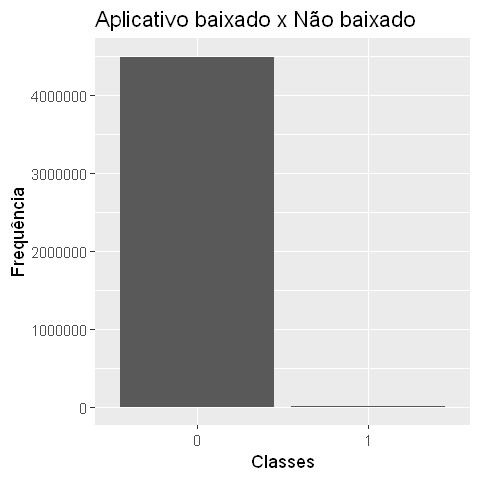

In [6]:
# QUANTIDADE DE CLASSES
g0 <- ggplot(df_Talking_Data, aes(x = as.factor(Aplicativo.Baixado))) +
geom_bar(stat = 'count') +
coord_cartesian(ylim = c(0, 4500000)) +
labs(title = "Aplicativo baixado x Não baixado",x = 'Classes', y = 'Frequência')
#ggplotly(g0, width = 400, height = 425)
options(repr.plot.width = 4, repr.plot.height = 4)
g0

In [7]:
total.obs <- nrow(df_Talking_Data)
baixado <- nrow(df_Talking_Data[df_Talking_Data$Aplicativo.Baixado == 1,])
nao.baixado <- nrow(df_Talking_Data[df_Talking_Data$Aplicativo.Baixado == 0,])

In [8]:
percentual.nao.baixado <- nao.baixado/total.obs 
percentual.baixado <- baixado/total.obs; 
cat("classe 0 (não baixado)\nPercentual:", round(percentual.nao.baixado*100, 2))
cat("\n\nclasse 1 (baixado)\nPercentual:",round(percentual.baixado*100, 2))

classe 0 (não baixado)
Percentual: 99.75

classe 1 (baixado)
Percentual: 0.25

In [9]:
## SLICE DATASET - APLICATIVO NÃO BAIXADO
df_nao_baixado <- df_Talking_Data[df_Talking_Data$Aplicativo.Baixado == 0,]
df_nao_baixado$Aplicativo.Baixado <- as.factor(df_nao_baixado$Aplicativo.Baixado)

In [10]:
# FUNÇÃO PARA PLOTAGEM DO GRÁFICO DE BARRAS
grafico.barras <- function(x, xlab, title){
    ggplot(x[1:15,], aes(x = reorder(Var1, Freq), y = Freq)) +
        geom_bar(stat = "identity") + labs(x = xlab, y = "Frequência", title = title) +
        theme_minimal() +
        theme(text = element_text(size = 8)) +
        coord_flip()
}

In [11]:
# IP DE ENDEREÇO DE CLIQUE - ID
ip <- data.frame(table(df_nao_baixado$IP))
ip <- ip[order(ip$Freq, decreasing = T),]

# 15 IPS DE ENDEREÇO DE CLIQUES (IP) LIGADOS A CLIQUES QUE NÃO BAIXARAM O APLICATIVO
g1 = grafico.barras(ip, 'IP', 'IP dos cliques sem download')

In [12]:
# ID DE APLICATIVO PARA MARKETING - ID.App
id.aplicativo <- data.frame(table(df_nao_baixado$ID.App))
id.aplicativo <- id.aplicativo[order(id.aplicativo$Freq, decreasing = T),]

# 15 IDS DE APLICATIVOS (ID.App) LIGADOS A CLIQUES QUE NÃO BAIXARAM O APLICATIVO
g2 = grafico.barras(id.aplicativo, 'ID do aplicativo', 'ID do aplicativo de marketing e cliques sem download')

In [13]:
# IDENTIFICAÇÃO DO TIPO DISPOSITIVO - Tipo.Dispositivo
identificacao.dispositivo <- data.frame(table(df_nao_baixado$Tipo.Dispositivo))
identificacao.dispositivo <- identificacao.dispositivo[order(identificacao.dispositivo$Freq, decreasing = T),]

# 15 TIPOS DE DISPOSITIVOS (Tipo.Dispositivo) LIGADOS A CLIQUES QUE NÃO BAIXARAM O APLICATIVO
g3 = grafico.barras(identificacao.dispositivo, 'Tipo do dispositivo', 'Tipo dispositivo e cliques sem download')

In [14]:
# ID VERSÃO DO SISTEMA OPERACIONAL DO CELULAR DO USUÁRIO - ID.OS
id.sistema.operacional <- data.frame(table(df_nao_baixado$ID.OS))
id.sistema.operacional <- id.sistema.operacional[order(id.sistema.operacional$Freq, decreasing = T),]

# 15 IDS VERSÃO DO SISTEMA OPERACIONAL DO CELULAR DO USUÁRIO (ID.OS) LIGADOS A CLIQUES QUE NÃO BAIXARAM O APLICATIVO
g4 <- grafico.barras(id.sistema.operacional, 'ID do OS', 'ID do OS do usuário e cliques sem download ')

In [15]:
# ID DO CANAL DE ANÚNCIOS - ID.Canal.Anuncio
id.canal <- data.frame(table(df_nao_baixado$ID.Canal.Anuncio))
id.canal <- id.canal [order(id.canal$Freq, decreasing = T),]

# 15 IDS DE APLICATIVOS (ID.App) LIGADOS A CLIQUES QUE NÃO BAIXARAM O APLICATIVO
g5 <- grafico.barras(id.canal, "ID Canal Anúncios", 'Canal e cliques sem download')

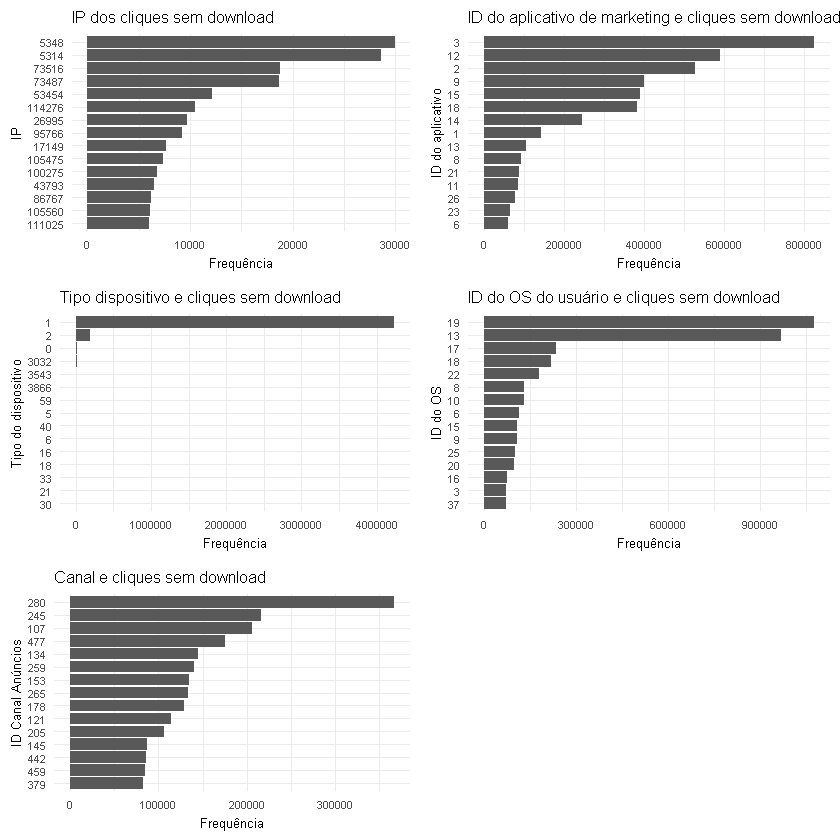

In [16]:
options(repr.plot.width = 7, repr.plot.height = 7)
grid.arrange(g1, g2, g3, g4, g5)

O tipo de dispositivo 1 é o que mais está associado à cliques sem downloads. Os IDs do sistema operacional 19 e 13 são os mais associados à cliques sem downloads. Já o canal mais vulnerável a cliques sem downloads é o 280.

In [17]:
# PERÍODO DE CLIQUES NO DATASET - DATA E HORÁRIO
# dif_dia <- as.duration(fim-inicio); dif_dia -> outra forma de ver a diferença de dias
inicio <- min(df_Talking_Data$Click.Horario); cat(sprintf("De: %s",inicio))
fim <- max(df_Talking_Data$Click.Horario); cat(sprintf("\nAté: %s",fim))

De: 2017-11-06 14:48:55
Até: 2017-11-09 16:00:00

In [18]:
# DIFERENÇA EM DIAS
diferenca_dia <- fim - inicio; diferenca_dia

Time difference of 3.049363 days

In [19]:
# TABELA COM A FREQUENCIA DE CLIQUES SEM DOWNLOAD EM DETERMINADO HORÁRIO 
df <- data.frame(table(df_nao_baixado$Click.Horario)); head(df,3)

Var1,Freq
2017-11-06 14:48:55,1
2017-11-06 15:39:18,1
2017-11-06 15:43:36,1


In [20]:
# ACRESCENTANDO DATA E DIA E HORA (SEM CONTAR MINUTOS E SEGUNDOS)
df <- df %>%
    mutate(Data = make_date(year(df$Var1), month(df$Var1), day(df$Var1)),
           Data.Horario = df$Var1,
           Freq.Cliques = df$Freq,
           Dia.Hora = make_datetime(year(df$Var1), month(df$Var1), day(df$Var1), hour(df$Var1)))
df <- select(df, Data, Data.Horario, Dia.Hora, Freq.Cliques); head(df,3)

Data,Data.Horario,Dia.Hora,Freq.Cliques
2017-11-06,2017-11-06 14:48:55,2017-11-06 14:00:00,1
2017-11-06,2017-11-06 15:39:18,2017-11-06 15:00:00,1
2017-11-06,2017-11-06 15:43:36,2017-11-06 15:00:00,1


In [21]:
# AGRUPAMENTO POR DIA E HORA
df2 <- df %>%
     group_by(Data,Dia.Hora) %>%
     summarise(Freq.Cliques = sum(Freq.Cliques)); head(df2,3)

Data,Dia.Hora,Freq.Cliques
2017-11-06,2017-11-06 14:00:00,1
2017-11-06,2017-11-06 15:00:00,11
2017-11-06,2017-11-06 16:00:00,55935


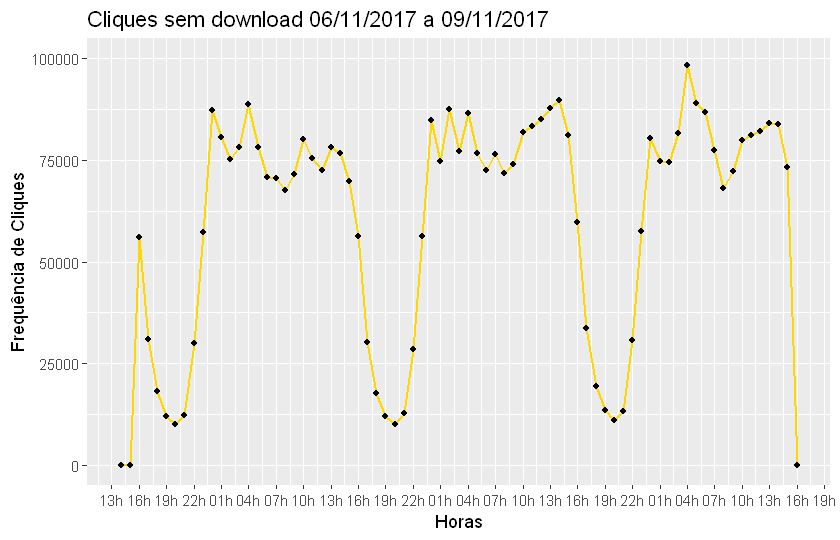

In [22]:
g6 <- ggplot(df2, aes(x = Dia.Hora , y = Freq.Cliques)) +
geom_line(size = 0.7,colour = 'gold') +                    
geom_point(size = 1.3, colour = 'black') +
scale_x_datetime(labels = date_format(format = '%Hh', tz = "UTC"), date_breaks = "3 hours") +
coord_cartesian(ylim = c(0, 100000)) +
labs(x = 'Horas', y = 'Frequência de Cliques', title = 'Cliques sem download 06/11/2017 a 09/11/2017')
#ggplotly(g6, width = 800, height = 600)
options(repr.plot.width = 7, repr.plot.height = 4.5)
g6

No gráfico precebe-se que os picos ocorrem de 00h00 às 14h00. Há um enorme crescimento de cliques sem download no período de 21h00 às 00h00 nos dias 6, 7 e 8 e uma queda enorme no período de 15h00 às 20h00 nos dias 6 e 7 e de 15h00 às 16h00 no dia 9.

In [23]:
# ESTATÍSTICA DE CLIQUES SEM DOWNLOAD POR HORA - DIA 06/11/2017 DE 14h48 ÀS 23h59
dia06 <- df2[df2$Data == as.Date('2017-11-06'),]
# ESTATÍSTICA DE CLIQUES FRAUDULENTOS POR HORA - DIA 07/11/2017 DE 00h ÀS 23h59
dia07 <- df2[df2$Data == as.Date('2017-11-07'),]
# ESTATÍSTICA DE CLIQUES FRAUDULENTOS POR HORA - DIA 08/11/2017 DE 00h ÀS 23h59
dia08 <- df2[df2$Data == as.Date('2017-11-08'),]
# ESTATÍSTICA DE CLIQUES FRAUDULENTOS POR HORA - DIA 09/11/2017 DE 00h ÀS 16h00
dia09 <- df2[df2$Data == as.Date('2017-11-09'),]

In [24]:
cat("Estatísticas cliques sem download:\n\nDia 06-11-2017 das 14h48 às 23h59\n\nMédia de cliques/hora:",mean(dia06$Freq.Cliques),
"\nMédia de cliques/minuto:", mean(dia06$Freq.Cliques)/60)

cat("\n\nDia 07-11-2017 das 00h às 23h59 \n\nMédia de cliques/hora:", mean(dia07$Freq.Cliques),
"\nMédia de cliques/minuto:", mean(dia07$Freq.Cliques)/60)

cat("\n\nDia 08-11-2017 das 00h às 23h59 \n\nMédia de cliques/hora:", mean(dia08$Freq.Cliques),
"\nMédia de cliques/minuto:", mean(dia08$Freq.Cliques)/60)

cat("\n\nDia 09-11-2017 das 00h às 16h00 \n\nMédia de cliques/hora:", mean(dia09$Freq.Cliques),
"\nMédia de cliques/minuto:", mean(dia09$Freq.Cliques)/60)

Estatísticas cliques sem download:

Dia 06-11-2017 das 14h48 às 23h59

Média de cliques/hora: 22618.9 
Média de cliques/minuto: 376.9817

Dia 07-11-2017 das 00h às 23h59 

Média de cliques/hora: 60213.33 
Média de cliques/minuto: 1003.556

Dia 08-11-2017 das 00h às 23h59 

Média de cliques/hora: 63750.04 
Média de cliques/minuto: 1062.501

Dia 09-11-2017 das 00h às 16h00 

Média de cliques/hora: 75741.65 
Média de cliques/minuto: 1262.361

No dia 09/11 houve a maior média de cliques por hora. Em 16 horas, a média obtida foi de 75741.65 cliques, o que superou as médias dos dias 07/11 e 08/11 em 24 horas.

In [25]:
# AGRUPAMENTO POR HORA PARA SABER EM QUAL HORÁRIO SE TEM MAIS CLIQUES SEM DOWNLOADS
df3 <- df %>%
    separate (col = Dia.Hora, c ("Dia", "Hora"), sep = ' ', remove = TRUE)

df4 <- df3 %>%
             group_by(Hora) %>%
             summarise(Horario.Mais.Cliques = sum(Freq.Cliques))

df4 <- df4 %>%
     separate(col = Hora, c ("Hora", "s", "m"), sep = ':', remove = TRUE) %>%
     select(Hora, Horario.Mais.Cliques)

head(df4, 5)

Hora,Horario.Mais.Cliques
00,252433
01,230007
02,237182
03,236996
04,273690


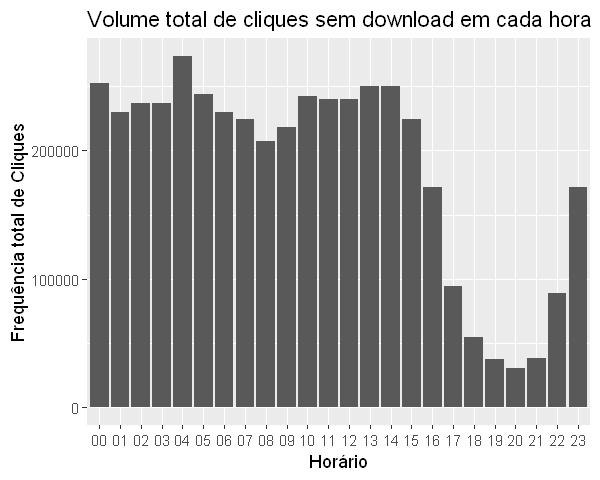

In [26]:
# HORÁRIOS COM MAIOR VOLUME DE CLIQUES NOS TRÊS DIAS
g7 <- ggplot(df4, aes(x = Hora, y = Horario.Mais.Cliques)) +                 
     geom_bar(stat="identity") +
     labs(x = 'Horário', y = 'Frequência total de Cliques', title = 'Volume total de cliques sem download em cada hora')

#ggplotly(g7, width = 800, height = 600)
options(repr.plot.width = 5, repr.plot.height = 4)
g7

Nos horários de 00h00 a 15h00 é quando mais se tem cliques sem download.

In [27]:
# CORRELAÇÃO DE VARIÁVEIS DO DATASET DA AMOSTRA DO DATASET TALKING_DATA
cor(df_Talking_Data[,-c(6:7)])

,IP,ID.App,Tipo.Dispositivo,ID.OS,ID.Canal.Anuncio,Aplicativo.Baixado
IP,1.0000000000,0.00614581,-0.001232667,-0.0004522545,0.004977461,0.053647141
ID.App,0.0061458101,1.00000000,0.254780608,0.2545633219,-0.027726205,0.059730710
Tipo.Dispositivo,-0.0012326668,0.25478061,1.000000000,0.9412186443,-0.034314979,0.001260945
ID.OS,-0.0004522545,0.25456332,0.941218644,1.0000000000,-0.031283118,0.002156188
ID.Canal.Anuncio,0.0049774614,-0.02772620,-0.034314979,-0.0312831184,1.000000000,-0.024230232
Aplicativo.Baixado,0.0536471412,0.05973071,0.001260945,0.0021561882,-0.024230232,1.000000000


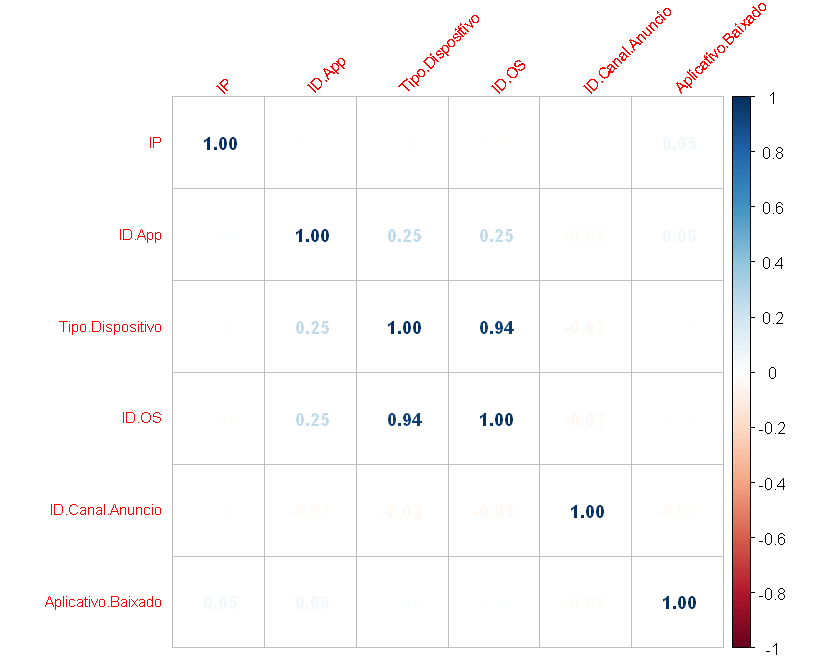

In [28]:
suppressPackageStartupMessages({library(corrplot)})
options(repr.plot.width = 7, repr.plot.height = 5.5)
corrplot(cor(df_Talking_Data[,-c(6:7)]), method = "number", tl.cex = 0.75, number.cex = 0.9, tl.srt = 45) 

In [29]:
df_Talking_Data$Aplicativo.Baixado <- as.factor(df_Talking_Data$Aplicativo.Baixado)
glimpse(df_Talking_Data)

Observations: 4,500,000
Variables: 8
$ IP                 <int> 101863, 288158, 58404, 34222, 40631, 134018, 816...
$ ID.App             <int> 3, 18, 2, 28, 2, 3, 3, 3, 3, 12, 28, 9, 18, 14, ...
$ Tipo.Dispositivo   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ ID.OS              <int> 13, 19, 17, 19, 19, 19, 14, 15, 13, 9, 13, 13, 3...
$ ID.Canal.Anuncio   <int> 137, 121, 237, 135, 236, 280, 280, 280, 280, 19,...
$ Click.Horario      <dttm> 2017-11-07 08:50:35, 2017-11-09 01:14:54, 2017-...
$ Hora.Download      <dttm> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,...
$ Aplicativo.Baixado <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...


#### **SEPARANDO DADOS DE TREINO E TESTE**

In [ ]:
#split <- sample.split(df_Talking_Data$Aplicativo.Baixado, SplitRatio = 0.7)
#dados_treino <- subset(df_Talking_Data, split == TRUE)
#dados_teste <- subset(df_Talking_Data, split == FALSE )

In [ ]:
# DADOS TREINO 70%
#glimpse(dados_treino)

In [ ]:
# DADOS TESTE 30%
#glimpse(dados_teste)

In [ ]:
# packageVersion("dplyr")
# update.packages('dplyr')
# install.packages('dplyr')
# sessionInfo()
# update.packages(ask = FALSE) -> Atualiza todos os pacotes
# remove.packages('dplyr')

#### **BALANCEAMENTO DE CLASSES DOS DADOS DE TREINO**

In [ ]:
# BIBLIOTECA PARA UTILIZAR A FUNÇÃO tabyl()
#suppressPackageStartupMessages({library(janitor)})

In [ ]:
#tabyl(dados_treino$Aplicativo.Baixado)

In [ ]:
# install.packages("themis")

In [ ]:
#suppressPackageStartupMessages({library(themis)})

In [ ]:
# BALANCEAMENTO NOS DADOS DE TREINO (DOWNSAMPLE)
#dados_treino_down_sample <- recipe (Aplicativo.Baixado~., dados_treino) %>%
#step_downsample(Aplicativo.Baixado) %>%
#prep() %>%
#juice() 

In [ ]:
#tabyl(dados_treino_down_sample$Aplicativo.Baixado)

In [ ]:
# REMOVENDO AS VARIÁVEIS Click.Horario e Hora.Download DO DATASET DE TREINO BALANCEADO
#dados_treino_down_sample <- select(dados_treino_down_sample, -Click.Horario, -Hora.Download)
# DADOS TREINO BALANCEADO
#glimpse(dados_treino_down_sample)

In [ ]:
# REMOVENDO AS VARIÁVEIS Click.Horario e Hora.Download DO DATASET DE TESTE
#dados_teste_final <- select(dados_teste, -Click.Horario, -Hora.Download)
# DADOS TREINO BALANCEADO
#glimpse(dados_teste_final)

In [ ]:
# SALVANDO DADOS DE TREINO (dados_treino_down_sample) E TESTE (dados_teste_final)
#write_csv(dados_treino_down_sample, "dados_treino_down_sample.csv")
#write_csv(dados_teste_final, "dados_teste_final.csv")

In [30]:
# CARREGANDO DADOS DE TREINO
dados_treino_down_sample <- fread("dados_treino_down_sample.csv")
dados_treino_down_sample <- as.data.frame(dados_treino_down_sample)
dados_treino_down_sample$Aplicativo.Baixado <- as.factor(dados_treino_down_sample$Aplicativo.Baixado)
glimpse(dados_treino_down_sample)

Observations: 15,514
Variables: 6
$ IP                 <int> 133783, 133522, 175250, 100971, 25679, 140869, 7...
$ ID.App             <int> 12, 1, 12, 14, 18, 3, 18, 15, 2, 14, 18, 3, 15, ...
$ Tipo.Dispositivo   <int> 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, ...
$ ID.OS              <int> 20, 9, 13, 19, 13, 1, 19, 13, 17, 3, 13, 16, 13,...
$ ID.Canal.Anuncio   <int> 245, 125, 497, 489, 107, 280, 107, 3, 469, 134, ...
$ Aplicativo.Baixado <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...


In [31]:
# CARREGANDO DADOS DE TESTE
dados_teste_final <- fread("dados_teste_final.csv")
dados_teste_final <- as.data.frame(dados_teste_final)
dados_teste_final$Aplicativo.Baixado <- as.factor(dados_teste_final$Aplicativo.Baixado)
glimpse(dados_teste_final)

Observations: 1,350,000
Variables: 6
$ IP                 <int> 81613, 48383, 74013, 114759, 40213, 120282, 5178...
$ ID.App             <int> 3, 3, 9, 3, 18, 12, 3, 3, 3, 2, 2, 14, 18, 18, 1...
$ Tipo.Dispositivo   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ ID.OS              <int> 14, 15, 13, 20, 6, 18, 20, 25, 41, 19, 22, 19, 1...
$ ID.Canal.Anuncio   <int> 280, 280, 134, 137, 134, 265, 442, 280, 280, 122...
$ Aplicativo.Baixado <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...


### **2 - APRENDIZADO**

### **MODELO 1 - REGRESSÃO LOGÍSTICA (pacote:caret)**

In [32]:
# CARREGANDO BIBLIOTECA
suppressPackageStartupMessages({library(caret)})

In [33]:
# MODELO
modelo.rl <- glm(formula = Aplicativo.Baixado ~ ., data = dados_treino_down_sample, family = "binomial" )

In [34]:
# VISUALIZAÇÃO DO MODELO
summary(modelo.rl)


Call:
glm(formula = Aplicativo.Baixado ~ ., family = "binomial", data = dados_treino_down_sample)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -0.8205  -0.1653   0.8127   2.4097  

Coefficients:
                      Estimate    Std. Error z value            Pr(>|z|)    
(Intercept)      -1.5305140195  0.0614078566 -24.924 <0.0000000000000002 ***
IP                0.0000090538  0.0000002268  39.916 <0.0000000000000002 ***
ID.App            0.0677329410  0.0018328644  36.955 <0.0000000000000002 ***
Tipo.Dispositivo -0.0001889478  0.0001056454  -1.789              0.0737 .  
ID.OS            -0.0011687494  0.0004859416  -2.405              0.0162 *  
ID.Canal.Anuncio -0.0030982494  0.0001642664 -18.861 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 21507  on 15513  degrees of freedom
Residual deviance: 16016  on 15508  degrees of freed

In [35]:
# FEATURE SELECTION
# VERIFICAR AS VARIÁVEIS MAIS IMPORTANTES DO MODELO ATRAVÉS DE OVERALL
varImp(modelo.rl) # pacote caret

,Overall
IP,39.915888
ID.App,36.954692
Tipo.Dispositivo,1.788509
ID.OS,2.405123
ID.Canal.Anuncio,18.861126


In [ ]:
# VERIFICAR AS VARIÁVEIS MAIS IMPORTANTES DO MODELO ATRAVÉS DE PLOT
# var.importantes.modelo.rl <- varImp(modelo.rl, scale = FALSE)
# options(repr.plot.width = 4, repr.plot.height = 4)
# plot(varImp(modelo.rl)) # pacote caret

In [36]:
# PREVISÃO DO MODELO
previsao.modelo.rl <- predict(modelo.rl, dados_teste_final, type = "response")

In [37]:
# AVALIAÇÃO DO MODELO
# MATRIZ DE CONFUSÃO
matriz_confusao1 <- table(Previsto = as.factor(round(previsao.modelo.rl)), Reference = dados_teste_final$Aplicativo.Baixado)
matriz_confusao1

        Reference
Previsto       0       1
       0 1085477     868
       1  261198    2457

In [38]:
# MATRIZ DE CONFUSÃO (OUTRA FORMA DE MATRIZ COM O PACOTE caret)
matriz_confusao1.1 <- confusionMatrix(as.factor(round(previsao.modelo.rl)), dados_teste_final$Aplicativo.Baixado)
matriz_confusao1.1

Confusion Matrix and Statistics

          Reference
Prediction       0       1
         0 1085477     868
         1  261198    2457
                                             
               Accuracy : 0.8059             
                 95% CI : (0.8052, 0.8065)   
    No Information Rate : 0.9975             
    P-Value [Acc > NIR] : 1                  
                                             
                  Kappa : 0.0136             
                                             
 Mcnemar's Test P-Value : <0.0000000000000002
                                             
            Sensitivity : 0.806042           
            Specificity : 0.738947           
         Pos Pred Value : 0.999201           
         Neg Pred Value : 0.009319           
             Prevalence : 0.997537           
         Detection Rate : 0.804057           
   Detection Prevalence : 0.804700           
      Balanced Accuracy : 0.772495           
                                      

In [ ]:
# MATRIZ DE CONFUSÃO (OUTRA FORMA DE MATRIZ COM PACOTE gmodels)
# suppressPackageStartupMessages({library(gmodels)})
#matriz_confusao1.2 <- CrossTable(x = as.factor(round(previsao.modelo.rl)), y = dados_teste_final$Aplicativo.Baixado, 
#                                 prop.chisq = FALSE)
#matriz_confusao1.2

#### **MÉTRICAS  DO MODELO DE REGRESSÃO LOGÍSTICA**

In [39]:
# ACURÁCIA (Accuracy) - MEDE A PRECISÃO DO MODELO DE CLASSIFICAÇÃO. QUANTO MAIOR MELHOR.
# TRUE POSITIVO = tp
# TRUE NEGATIVO = tn
# FALSO POSITIVO = fp
# FALSO NEGATIVO = fn
# Accuracy: tp + tn/ tp + tn + fp + fn OU Total de resultados corretos/ Total de resultados analisados

Acuracia1 <- (matriz_confusao1[1,1] + matriz_confusao1[2,2])/(matriz_confusao1[1,1] + matriz_confusao1[2,2] + 
                                                              matriz_confusao1[1,2] + matriz_confusao1[2,1])

# PRECISÃO (Precision) - PROPORÇÃO DE RESULTADOS VERDADEIROS SOBRE OS POSITIVOS. QUANTO MAIOR MELHOR.
# tp/(tp + fp)
precisao1 <- matriz_confusao1[1,1]/(matriz_confusao1[1,1] + matriz_confusao1[1,2])

# RECUPERAÇÃO (Recall) - FRAÇÃO DE RESULTADOS CORRETOS RETORNADO PELO MODELO. QUANTO MAIOR MELHOR.
# tp/(tp + fn)
recall1 <- matriz_confusao1[1,1] / (matriz_confusao1[1,1] + matriz_confusao1[2,1])

# F1 SCORE - MÉDIA PODERADA ENTRE A PRECISÃO E RECALL. O VALOR IDEAL PARA O F-SCORE É IGUAL A 1.
# 2*tp / (2 * tp + fp + fn) OU 2 * precisao * recall/ (precisao + recall)

f1_score1 <- 2 * precisao1 * recall1/(precisao1 + recall1)

In [40]:
cat("Modelo de Regressão Logística\n\nAcurácia:", round(Acuracia1,4),
    "\nRecall:", round(recall1,4),
    "\nPrecisão:", round(precisao1,4),
    "\nF1 Score:", round(f1_score1,4))

Modelo de Regressão Logística

Acurácia: 0.8059 
Recall: 0.806 
Precisão: 0.9992 
F1 Score: 0.8923

In [41]:
# PERCENTUAL DE PREVISÕES CORRETAS - ACURÁCIA DE OUTRO JEITO
round(mean(as.factor(round(previsao.modelo.rl)) == dados_teste_final$Aplicativo.Baixado), 4) 

[1] 0.8059

In [42]:
# CURVA ROC 
# AUC - QUANTO MAIS A ESQUERDA ESTIVER A CURVA, MAIOR A PRECISÃO DO MODELO
# install.packages("ROCR")
suppressPackageStartupMessages({library(ROCR)})
source("plot_utils.R") 

In [43]:
previsao1 <- prediction(previsao.modelo.rl, dados_teste_final$Aplicativo.Baixado)

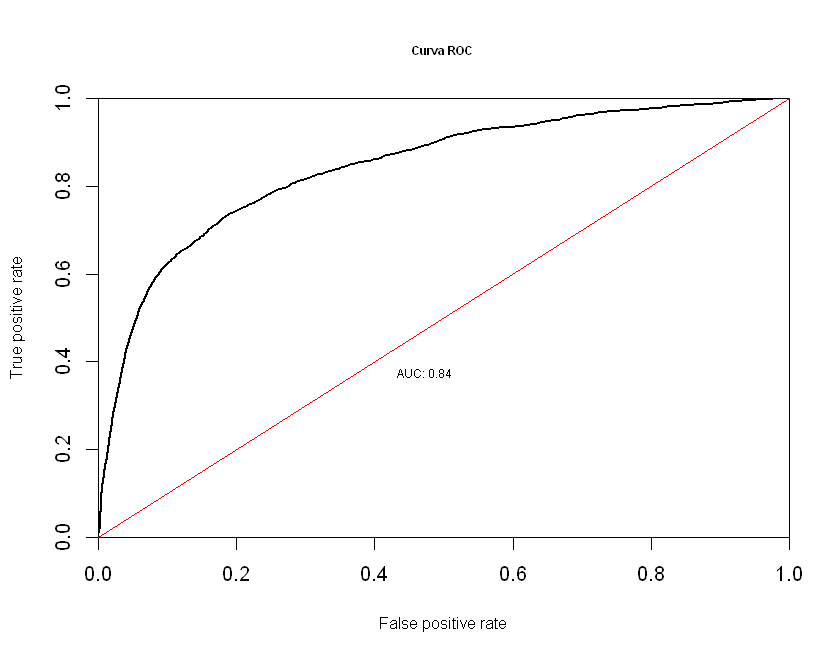

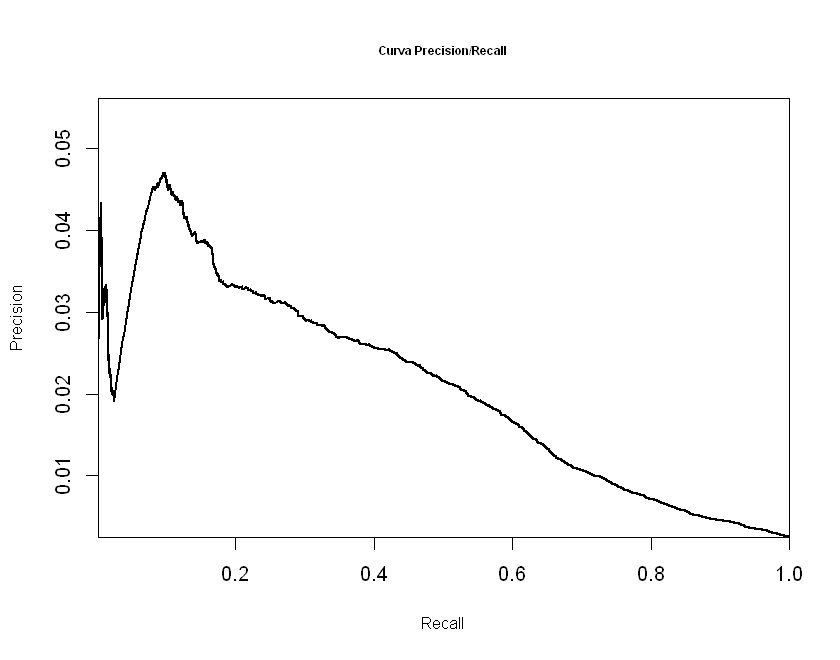

In [44]:
plot.roc.curve(previsao1, title.text = "Curva ROC")
plot.pr.curve(previsao1, title.text = "Curva Precision/Recall")

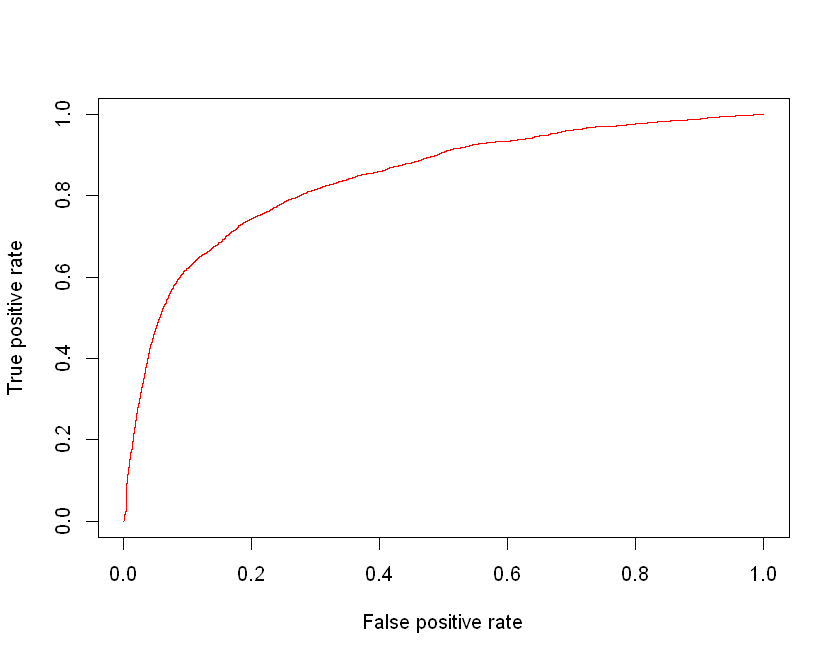

In [45]:
# CURVA ROC DE OUTRA FORMA                                        
previsao1.1 <- prediction(previsao.modelo.rl, dados_teste_final$Aplicativo.Baixado)
previsao1.1 <- performance(previsao1.1, "tpr","fpr",)  #Performance com as métricas
plot(previsao1.1, col = rainbow(10))

### **MODELO 2 - NAIVE BAYES (pacote:e1071)**

In [46]:
# CARREGANDO BIBLIOTECA
suppressPackageStartupMessages({library(e1071)})

In [47]:
# MODELO
modelo.naivebayes <- naiveBayes(Aplicativo.Baixado ~ ., data = dados_treino_down_sample)

In [48]:
# VISUALIZAÇÃO DO MODELO
summary(modelo.naivebayes)
str(modelo.naivebayes)

          Length Class  Mode     
apriori   2      table  numeric  
tables    5      -none- list     
levels    2      -none- character
isnumeric 5      -none- logical  
call      4      -none- call     

List of 5
 $ apriori  : 'table' int [1:2(1d)] 7757 7757
  ..- attr(*, "dimnames")=List of 1
  .. ..$ Y: chr [1:2] "0" "1"
 $ tables   :List of 5
  ..$ IP              : num [1:2, 1:2] 90991 164643 69505 104648
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ Y : chr [1:2] "0" "1"
  .. .. ..$ IP: NULL
  ..$ ID.App          : num [1:2, 1:2] 12 29.6 17 32.7
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ Y     : chr [1:2] "0" "1"
  .. .. ..$ ID.App: NULL
  ..$ Tipo.Dispositivo: num [1:2, 1:2] 22.9 27.9 264.9 192.9
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ Y               : chr [1:2] "0" "1"
  .. .. ..$ Tipo.Dispositivo: NULL
  ..$ ID.OS           : num [1:2, 1:2] 22.8 25 55.4 56.8
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ Y    : chr [1:2] "0" "1"
  .. .. ..$ ID.OS: NULL
  ..$ ID.Canal.Anuncio: num [1:2, 1:2] 266 205 128 114
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ Y               : chr [1:2] "0" "1"
  .. .. ..$ ID.Canal.Anuncio: NULL
 $ levels   : chr [1:2

In [49]:
# PREVISÃO DO MODELO
previsao.modelo.naivebayes <- predict(modelo.naivebayes, dados_teste_final)

In [50]:
# MATRIZ DE CONFUSÃO
matriz_confusao2 <- table(Previsto = previsao.modelo.naivebayes, Reference = dados_teste_final$Aplicativo.Baixado)
matriz_confusao2

        Reference
Previsto       0       1
       0 1181586    1226
       1  165089    2099

In [51]:
summary(previsao.modelo.naivebayes)

0       1 
1182812  167188

In [52]:
# MATRIZ DE CONFUSÃO (OUTRO MODO COM O caret)
library(caret)
matriz_confusao2.1 <- confusionMatrix(previsao.modelo.naivebayes, dados_teste_final$Aplicativo.Baixado)
matriz_confusao2.1

Confusion Matrix and Statistics

          Reference
Prediction       0       1
         0 1181586    1226
         1  165089    2099
                                             
               Accuracy : 0.8768             
                 95% CI : (0.8762, 0.8774)   
    No Information Rate : 0.9975             
    P-Value [Acc > NIR] : 1                  
                                             
                  Kappa : 0.0199             
                                             
 Mcnemar's Test P-Value : <0.0000000000000002
                                             
            Sensitivity : 0.87741            
            Specificity : 0.63128            
         Pos Pred Value : 0.99896            
         Neg Pred Value : 0.01255            
             Prevalence : 0.99754            
         Detection Rate : 0.87525            
   Detection Prevalence : 0.87616            
      Balanced Accuracy : 0.75434            
                                      

#### **MÉTRICAS  DO MODELO NAIVE BAYES**

In [53]:
# ACURÁCIA
# TRUE POSITIVO = tp
# TRUE NEGATIVO = tn
# FALSO POSITIVO = fp
# FALSO NEGATIVO = fn
# Accuracy: tp + tn/ tp + tn + fp + fn OU Total de resultados corretos/ Total de resultados analisados

Acuracia2 <- (matriz_confusao2[1,1] + matriz_confusao2[2,2])/(matriz_confusao2[1,1] + matriz_confusao2[2,2] + 
matriz_confusao2[1,2] + matriz_confusao2[2,1])

# PRECISÃO
# tp/(tp + fp)
precisao2 <- matriz_confusao2[1,1]/(matriz_confusao2[1,1] + matriz_confusao2[1,2])

# RECUPERAÇÃO 
# tp/(tp + fn)
recall2 <- matriz_confusao2[1,1] / (matriz_confusao2[1,1] + matriz_confusao2[2,1])

# F1 SCORE
# 2*tp / (2 * tp + fp + fn) OU 2 * precisao * recall/ (precisao + recall)

f1_score2 <- 2 * precisao2 * recall2/(precisao2 + recall2)

In [54]:
cat("Modelo Naive Bayes\n\nAcurácia:", round(Acuracia2,4),
    "\nRecall:", round(recall2,4),
    "\nPrecisão:", round(precisao2,4),
    "\nF1 Score:", round(f1_score2,4))

Modelo Naive Bayes

Acurácia: 0.8768 
Recall: 0.8774 
Precisão: 0.999 
F1 Score: 0.9342

In [55]:
# CURVA ROC DE OUTRA FORMA                                        
previsao2 <- prediction(as.double(previsao.modelo.naivebayes), dados_teste_final$Aplicativo.Baixado)

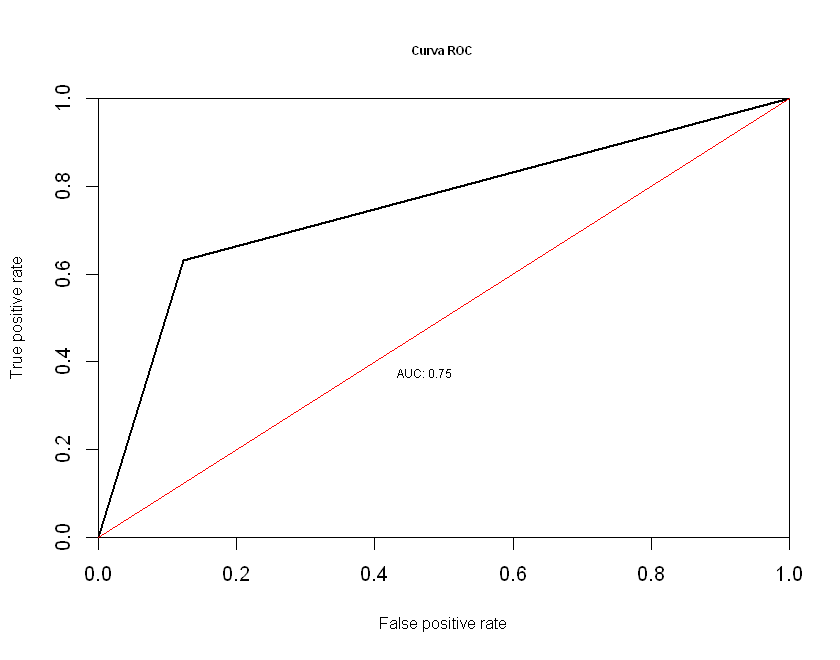

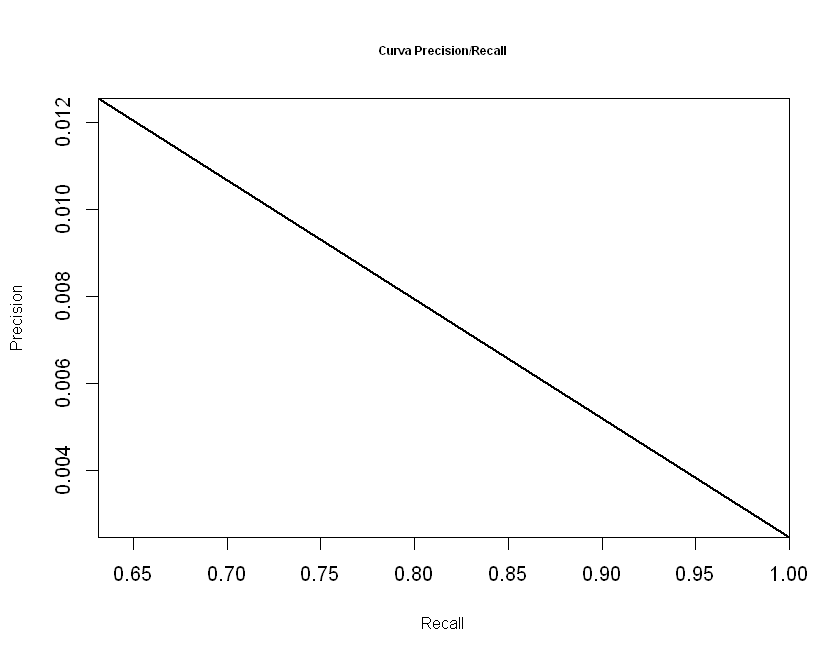

In [56]:
plot.roc.curve(previsao2, title.text = "Curva ROC")
plot.pr.curve(previsao2, title.text = "Curva Precision/Recall")

### **MODELO 3 - SUPPORT VECTOR MACHINES (pacote:e1071)**

In [57]:
# CARREGANDO BIBLIOTECA
suppressPackageStartupMessages({library(e1071)})

In [58]:
# MODELO
modelo.svm.e1071 <- svm(Aplicativo.Baixado ~ ., data = dados_treino_down_sample, type = 'C-classification', kernel = 'radial')

In [59]:
# VISUALIZAÇÃO DO MODELO
summary(modelo.svm.e1071)
str(modelo.svm.e1071)


Call:
svm(formula = Aplicativo.Baixado ~ ., data = dados_treino_down_sample, 
    type = "C-classification", kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  6886

 ( 3422 3464 )


Number of Classes:  2 

Levels: 
 0 1




List of 30
 $ call           : language svm(formula = Aplicativo.Baixado ~ ., data = dados_treino_down_sample,      type = "C-classification", kernel = "radial")
 $ type           : num 0
 $ kernel         : num 2
 $ cost           : num 1
 $ degree         : num 3
 $ gamma          : num 0.2
 $ coef0          : num 0
 $ nu             : num 0.5
 $ epsilon        : num 0.1
 $ sparse         : logi FALSE
 $ scaled         : logi [1:5] TRUE TRUE TRUE TRUE TRUE
 $ x.scale        :List of 2
  ..$ scaled:center: Named num [1:5] 127817.2 20.8 25.4 23.9 235.4
  .. ..- attr(*, "names")= chr [1:5] "IP" "ID.App" "Tipo.Dispositivo" "ID.OS" ...
  ..$ scaled:scale : Named num [1:5] 96160 27.5 231.7 56.1 125.1
  .. ..- attr(*, "names")= chr [1:5] "IP" "ID.App" "Tipo.Dispositivo" "ID.OS" ...
 $ y.scale        : NULL
 $ nclasses       : int 2
 $ levels         : chr [1:2] "0" "1"
 $ tot.nSV        : int 6886
 $ nSV            : int [1:2] 3422 3464
 $ labels         : int [1:2] 1 2
 $ SV             : 

In [60]:
# PREVISÃO DO MODELO
previsao.modelo.svm.e1071 <- predict(modelo.svm.e1071, dados_teste_final) 

In [61]:
# MATRIZ DE CONFUSÃO
matriz_confusao3 <- table(Previsto = previsao.modelo.svm.e1071, Reference = dados_teste_final$Aplicativo.Baixado)
matriz_confusao3

        Reference
Previsto       0       1
       0 1208028     847
       1  138647    2478

In [62]:
# MATRIZ DE CONFUSÃO (OUTRO MODO COM O caret)
library(caret)
matriz_confusao3.1 <- confusionMatrix(previsao.modelo.svm.e1071, dados_teste_final$Aplicativo.Baixado)
matriz_confusao3.1

Confusion Matrix and Statistics

          Reference
Prediction       0       1
         0 1208028     847
         1  138647    2478
                                             
               Accuracy : 0.8967             
                 95% CI : (0.8962, 0.8972)   
    No Information Rate : 0.9975             
    P-Value [Acc > NIR] : 1                  
                                             
                  Kappa : 0.0296             
                                             
 Mcnemar's Test P-Value : <0.0000000000000002
                                             
            Sensitivity : 0.89704            
            Specificity : 0.74526            
         Pos Pred Value : 0.99930            
         Neg Pred Value : 0.01756            
             Prevalence : 0.99754            
         Detection Rate : 0.89484            
   Detection Prevalence : 0.89546            
      Balanced Accuracy : 0.82115            
                                      

#### **MÉTRICAS  DO MODELO SVM e1071**

In [63]:
# ACURÁCIA
# TRUE POSITIVO = tp
# TRUE NEGATIVO = tn
# FALSO POSITIVO = fp
# FALSO NEGATIVO = fn
# Accuracy: tp + tn/ tp + tn + fp + fn OU Total de resultados corretos/ Total de resultados analisados

Acuracia3 <- (matriz_confusao3[1,1] + matriz_confusao3[2,2])/(matriz_confusao3[1,1] + matriz_confusao3[2,2] + 
matriz_confusao3[1,2] + matriz_confusao3[2,1])

# PRECISÃO
# tp/(tp + fp)
precisao3 <- matriz_confusao3[1,1]/(matriz_confusao3[1,1] + matriz_confusao3[1,2])

# RECUPERAÇÃO 
# tp/(tp + fn)
recall3 <- matriz_confusao3[1,1] / (matriz_confusao3[1,1] + matriz_confusao3[2,1])

# F1 SCORE
# 2*tp / (2 * tp + fp + fn) OU 2 * precisao * recall/ (precisao + recall)

f1_score3 <- 2 * precisao3 * recall3/(precisao3 + recall3)

In [64]:
cat("Modelo SVM e1071\n\nAcurácia:", round(Acuracia3,4),
    "\nRecall:", round(recall3,4),
    "\nPrecisão:", round(precisao3,4),
    "\nF1 Score:", round(f1_score3,4))

Modelo SVM e1071

Acurácia: 0.8967 
Recall: 0.897 
Precisão: 0.9993 
F1 Score: 0.9454

In [65]:
# CURVA ROC
previsao3 <- prediction(as.numeric(previsao.modelo.svm.e1071), dados_teste_final$Aplicativo.Baixado)

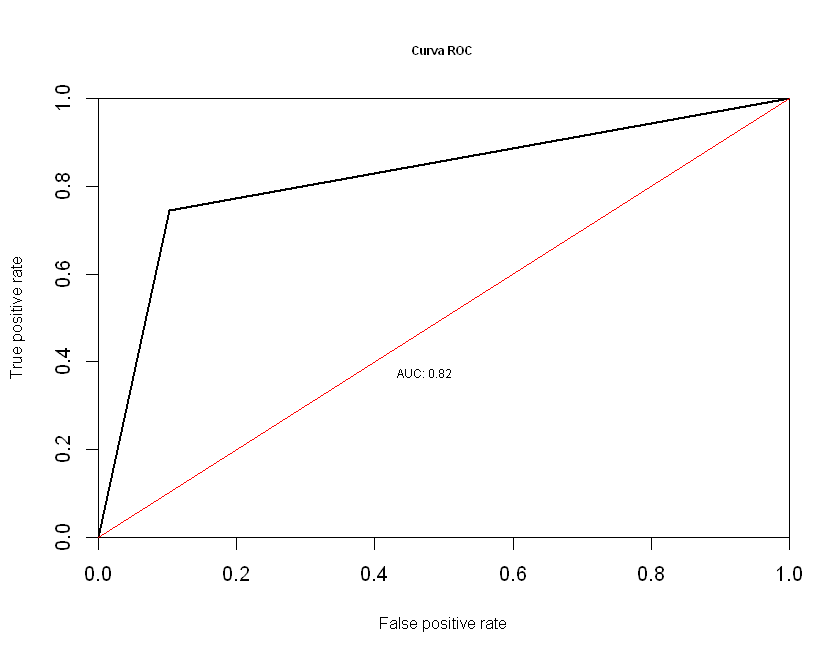

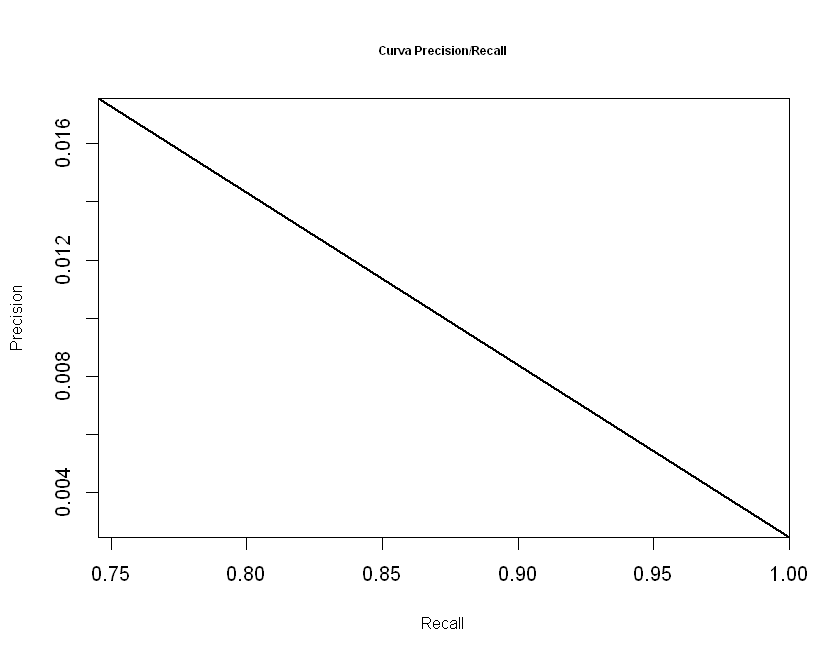

In [66]:
plot.roc.curve(previsao3, title.text = "Curva ROC")
plot.pr.curve(previsao3, title.text = "Curva Precision/Recall")

### **MODELO 4 - SUPPORT VECTOR MACHINES (pacote:kernlab)**

In [67]:
# CARREGANDO BIBLIOTECA
suppressPackageStartupMessages({library(kernlab)})

In [68]:
# MODELO
modelo.svm.kernlab <- ksvm(Aplicativo.Baixado ~., data = dados_treino_down_sample, kernel = "vanilladot")

 Setting default kernel parameters  


In [69]:
# VISUALIZAÇÃO DO MODELO
summary(modelo.svm.kernlab)
str(modelo.svm.kernlab)

Length  Class   Mode 
     1   ksvm     S4 

Formal class 'ksvm' [package "kernlab"] with 24 slots
  ..@ param     :List of 1
  .. ..$ C: num 1
  ..@ scaling   :List of 3
  .. ..$ scaled : logi [1:5] TRUE TRUE TRUE TRUE TRUE
  .. ..$ x.scale:List of 2
  .. .. ..$ scaled:center: Named num [1:5] 127817.2 20.8 25.4 23.9 235.4
  .. .. .. ..- attr(*, "names")= chr [1:5] "IP" "ID.App" "Tipo.Dispositivo" "ID.OS" ...
  .. .. ..$ scaled:scale : Named num [1:5] 96160 27.5 231.7 56.1 125.1
  .. .. .. ..- attr(*, "names")= chr [1:5] "IP" "ID.App" "Tipo.Dispositivo" "ID.OS" ...
  .. ..$ y.scale: NULL
  ..@ coef      :List of 1
  .. ..$ : num [1:8805] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
  ..@ alphaindex:List of 1
  .. ..$ : int [1:8805] 1 2 3 4 5 6 7 8 10 11 ...
  ..@ b         : num -0.248
  ..@ obj       : num -8800
  ..@ SVindex   : int [1:8805] 1 2 3 4 5 6 7 8 10 11 ...
  ..@ nSV       : int 8805
  ..@ prior     :List of 1
  .. ..$ :List of 2
  .. .. ..$ prior1: int 7757
  .. .. ..$ prior0: int 7757
  ..@ prob.model:List of 1
  .. ..$ : NULL

In [70]:
# PREVISÃO DO MODELO
previsao.modelo.svm.kernlab <- predict(modelo.svm.kernlab, dados_teste_final)

In [71]:
# MATRIZ DE CONFUSÃO
matriz_confusao4 <- table(Previsto = previsao.modelo.svm.kernlab, Reference = dados_teste_final$Aplicativo.Baixado)
matriz_confusao4 

        Reference
Previsto       0       1
       0 1102250     913
       1  244425    2412

In [72]:
# MATRIZ DE CONFUSÃO (OUTRO MODO COM O caret)
library(caret)
matriz_confusao4.1 <- confusionMatrix(previsao.modelo.svm.kernlab, dados_teste_final$Aplicativo.Baixado)
matriz_confusao4.1

Confusion Matrix and Statistics

          Reference
Prediction       0       1
         0 1102250     913
         1  244425    2412
                                             
               Accuracy : 0.8183             
                 95% CI : (0.8176, 0.8189)   
    No Information Rate : 0.9975             
    P-Value [Acc > NIR] : 1                  
                                             
                  Kappa : 0.0145             
                                             
 Mcnemar's Test P-Value : <0.0000000000000002
                                             
            Sensitivity : 0.818497           
            Specificity : 0.725414           
         Pos Pred Value : 0.999172           
         Neg Pred Value : 0.009772           
             Prevalence : 0.997537           
         Detection Rate : 0.816481           
   Detection Prevalence : 0.817158           
      Balanced Accuracy : 0.771955           
                                      

#### **MÉTRICAS  DO MODELO SVM kernlab**

In [73]:
# ACURÁCIA
# TRUE POSITIVO = tp
# TRUE NEGATIVO = tn
# FALSO POSITIVO = fp
# FALSO NEGATIVO = fn
# Accuracy: tp + tn/ tp + tn + fp + fn OU Total de resultados corretos/ Total de resultados analisados

Acuracia4 <- (matriz_confusao4[1,1] + matriz_confusao4[2,2])/(matriz_confusao4[1,1] + matriz_confusao4[2,2] + 
matriz_confusao4[1,2] + matriz_confusao4[2,1])

# PRECISÃO
# tp/(tp + fp)
precisao4 <- matriz_confusao4[1,1]/(matriz_confusao4[1,1] + matriz_confusao4[1,2])

# RECUPERAÇÃO 
# tp/(tp + fn)
recall4 <- matriz_confusao4[1,1] / (matriz_confusao4[1,1] + matriz_confusao4[2,1])

# F1 SCORE
# 2*tp / (2 * tp + fp + fn) OU 2 * precisao * recall/ (precisao + recall)

f1_score4 <- 2 * precisao4 * recall4/(precisao4 + recall4)

In [74]:
cat("Modelo SVM kernlab\n\nAcurácia:", round(Acuracia4,4),
    "\nRecall:", round(recall4,4),
    "\nPrecisão:", round(precisao4,4),
    "\nF1 Score:", round(f1_score4,4))

Modelo SVM kernlab

Acurácia: 0.8183 
Recall: 0.8185 
Precisão: 0.9992 
F1 Score: 0.8999

In [75]:
# CURVA ROC
previsao4 <- prediction(as.double(previsao.modelo.svm.kernlab), dados_teste_final$Aplicativo.Baixado)

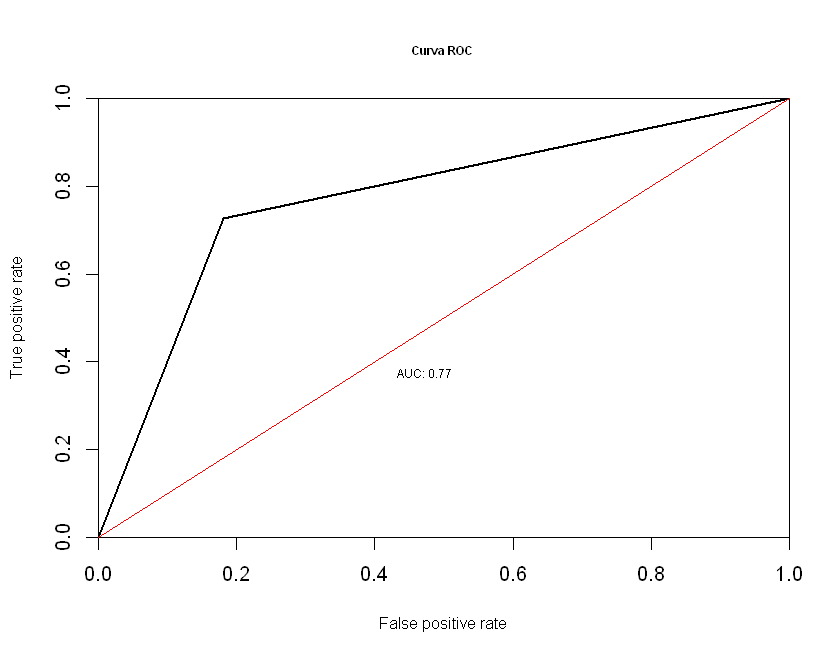

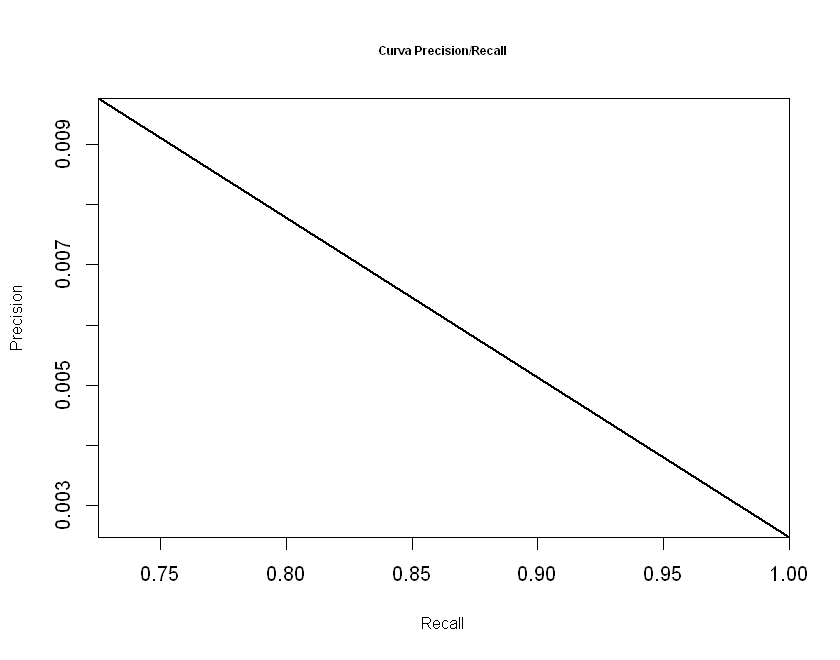

In [76]:
plot.roc.curve(previsao4, title.text = "Curva ROC")
plot.pr.curve(previsao4, title.text = "Curva Precision/Recall")

### **MODELO 5 - KNN (pacote:class)**

In [77]:
# CARREGANDO PACOTE
suppressPackageStartupMessages({library(class)})

In [78]:
# MODELO E PREVISÃO
modelo.knn <- knn(train = dados_treino_down_sample, 
                     test = dados_teste_final,
                     cl = dados_treino_down_sample$Aplicativo.Baixado, 
                     k = 15)

In [79]:
# VISUALIZAÇÃO DO MODELO
summary(modelo.knn)

0       1 
1028124  321876

In [80]:
# MATRIZ DE CONFUSÃO
matriz_confusao5 <- table(Previsto = modelo.knn, Reference = dados_teste_final$Aplicativo.Baixado)
matriz_confusao5

        Reference
Previsto       0       1
       0 1026881    1243
       1  319794    2082

In [81]:
# MATRIZ DE CONFUSÃO (OUTRO MODO COM O caret)
library(caret)
matriz_confusao5.1 <- confusionMatrix(modelo.knn, dados_teste_final$Aplicativo.Baixado)
matriz_confusao5.1

Confusion Matrix and Statistics

          Reference
Prediction       0       1
         0 1026881    1243
         1  319794    2082
                                             
               Accuracy : 0.7622             
                 95% CI : (0.7615, 0.7629)   
    No Information Rate : 0.9975             
    P-Value [Acc > NIR] : 1                  
                                             
                  Kappa : 0.008              
                                             
 Mcnemar's Test P-Value : <0.0000000000000002
                                             
            Sensitivity : 0.762531           
            Specificity : 0.626165           
         Pos Pred Value : 0.998791           
         Neg Pred Value : 0.006468           
             Prevalence : 0.997537           
         Detection Rate : 0.760653           
   Detection Prevalence : 0.761573           
      Balanced Accuracy : 0.694348           
                                      

#### **MÉTRICAS  DO MODELO KNN**

In [82]:
# ACURÁCIA
# TRUE POSITIVO = tp
# TRUE NEGATIVO = tn
# FALSO POSITIVO = fp
# FALSO NEGATIVO = fn
# Accuracy: tp + tn/ tp + tn + fp + fn OU Total de resultados corretos/ Total de resultados analisados

Acuracia5 <- (matriz_confusao5[1,1] + matriz_confusao5[2,2])/(matriz_confusao5[1,1] + matriz_confusao5[2,2] + 
matriz_confusao5[1,2] + matriz_confusao5[2,1])

# PRECISÃO
# tp/(tp + fp)
precisao5 <- matriz_confusao5[1,1]/(matriz_confusao5[1,1] + matriz_confusao5[1,2])

# RECUPERAÇÃO 
# tp/(tp + fn)
recall5 <- matriz_confusao5[1,1] / (matriz_confusao5[1,1] + matriz_confusao5[2,1])

# F1 SCORE
# 2*tp / (2 * tp + fp + fn) OU 2 * precisao * recall/ (precisao + recall)

f1_score5 <- 2 * precisao4 * recall5/(precisao5 + recall5)

In [83]:
cat("Modelo KNN\n\nAcurácia:", round(Acuracia5,4),
    "\nRecall:", round(recall5,4),
    "\nPrecisão:", round(precisao5,4),
    "\nF1 Score:", round(f1_score5,4))

Modelo KNN

Acurácia: 0.7622 
Recall: 0.7625 
Precisão: 0.9988 
F1 Score: 0.8651

In [84]:
# CURVA ROC
previsao5 <- prediction(as.double(modelo.knn), dados_teste_final$Aplicativo.Baixado)

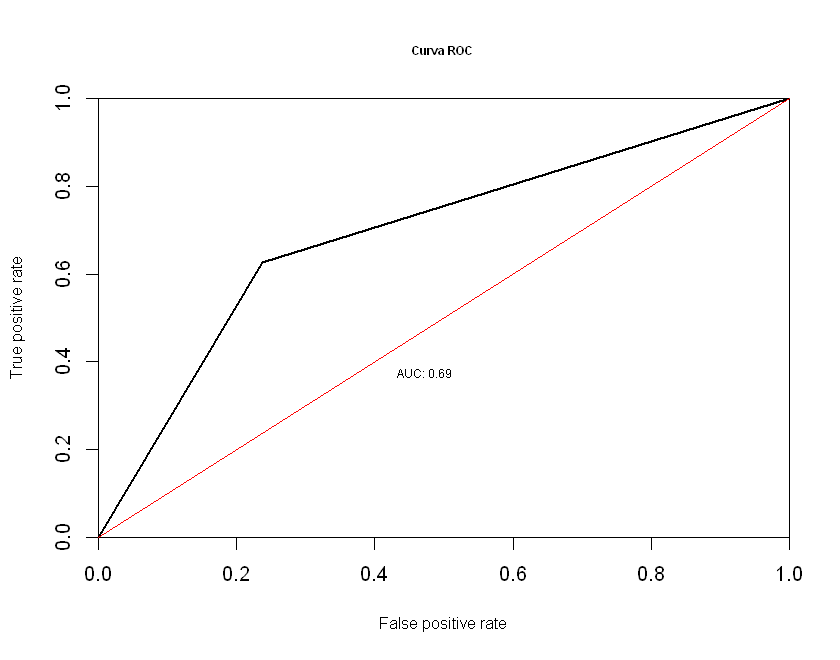

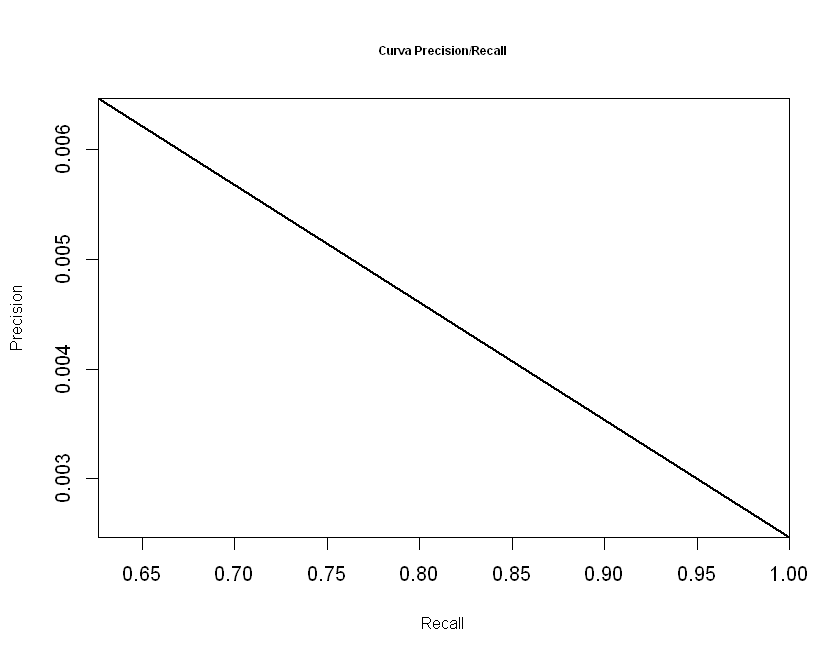

In [85]:
plot.roc.curve(previsao5, title.text = "Curva ROC")
plot.pr.curve(previsao5, title.text = "Curva Precision/Recall")

### **MODELO 6 - ÁRVORE DE DECISÃO (pacote:rpart)**

In [86]:
# CARREGANDO PACOTE
suppressPackageStartupMessages({library(rpart)})

In [87]:
# MODELO
modelo.arvore.decisao <- rpart(Aplicativo.Baixado ~ . , method = 'class', data = dados_treino_down_sample)

In [88]:
class(modelo.arvore.decisao)

[1] "rpart"

In [89]:
# EXAMINA O RESULTADO DO MODELO DA ÁRVORE DE DECISÃO printcp()
printcp(modelo.arvore.decisao)


Classification tree:
rpart(formula = Aplicativo.Baixado ~ ., data = dados_treino_down_sample, 
    method = "class")

Variables actually used in tree construction:
[1] ID.App           ID.Canal.Anuncio

Root node error: 7757/15514 = 0.5

n= 15514 

        CP nsplit rel error  xerror      xstd
1 0.581153      0   1.00000 1.03545 0.0080235
2 0.065360      1   0.41885 0.41885 0.0065336
3 0.057368      2   0.35349 0.35349 0.0061250
4 0.036032      3   0.29612 0.29612 0.0057028
5 0.010000      5   0.22406 0.22406 0.0050644


In [ ]:
# PLOTA A ÁRVORE DE DECISÃO plot() 
#plot(modelo.arvore.decisao, uniform = TRUE, main = "Arvore de Decisao")

# ACRESCENTA TEXTO AOS NÓS text() 
#text(modelo.arvore.decisao, use.n = TRUE, all = TRUE)

package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lealj\AppData\Local\Temp\RtmpCqY879\downloaded_packages


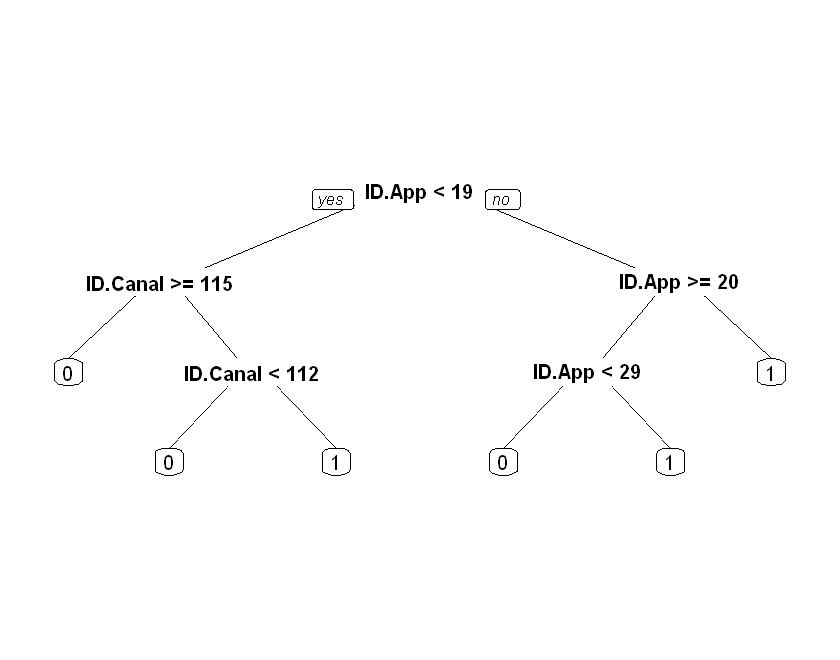

In [90]:
# OUTRA FORMA DE PLOTAR A ÁRVORE DE DECISÃO - FORMA MAIS AMIGÁVEL
suppressPackageStartupMessages({install.packages('rpart.plot')})
suppressPackageStartupMessages({library(rpart.plot)})
prp(modelo.arvore.decisao)

In [91]:
# PREVISÃO DO MODELO
previsao.modelo.arvore.decisao <- predict(modelo.arvore.decisao, dados_teste_final, type='class')

In [92]:
# MATRIZ DE CONFUSÃO
matriz_confusao6 <- table(Previsto = previsao.modelo.arvore.decisao, 
                          Reference = dados_teste_final$Aplicativo.Baixado)
matriz_confusao6

        Reference
Previsto       0       1
       0 1300162     593
       1   46513    2732

#### **MÉTRICAS DO MODELO DE ÁRVORE DE DECISÃO**

In [93]:
# ACURÁCIA
# TRUE POSITIVO = tp
# TRUE NEGATIVO = tn
# FALSO POSITIVO = fp
# FALSO NEGATIVO = fn
# Accuracy: tp + tn/ tp + tn + fp + fn OU Total de resultados corretos/ Total de resultados analisados

Acuracia6 <- (matriz_confusao6[1,1] + matriz_confusao6[2,2])/(matriz_confusao6[1,1] + matriz_confusao6[2,2] + 
matriz_confusao6[1,2] + matriz_confusao6[2,1])

# PRECISÃO
# tp/(tp + fp)
precisao6 <- matriz_confusao6[1,1]/(matriz_confusao6[1,1] + matriz_confusao6[1,2])

# RECUPERAÇÃO 
# tp/(tp + fn)
recall6 <- matriz_confusao6[1,1] / (matriz_confusao6[1,1] + matriz_confusao6[2,1])

# F1 SCORE
# 2*tp / (2 * tp + fp + fn) OU 2 * precisao * recall/ (precisao + recall)

f1_score6 <- 2 * precisao6 * recall6/(precisao6 + recall6)

In [94]:
cat("Modelo Árvore de Decisão\n\nAcurácia:", round(Acuracia6,4),
    "\nRecall:", round(recall6,4),
    "\nPrecisão:", round(precisao6,4),
    "\nF1 Score:", round(f1_score6,4))

Modelo Árvore de Decisão

Acurácia: 0.9651 
Recall: 0.9655 
Precisão: 0.9995 
F1 Score: 0.9822

In [95]:
# CURVA ROC
previsao6 <- prediction(as.double(previsao.modelo.arvore.decisao), dados_teste_final$Aplicativo.Baixado)

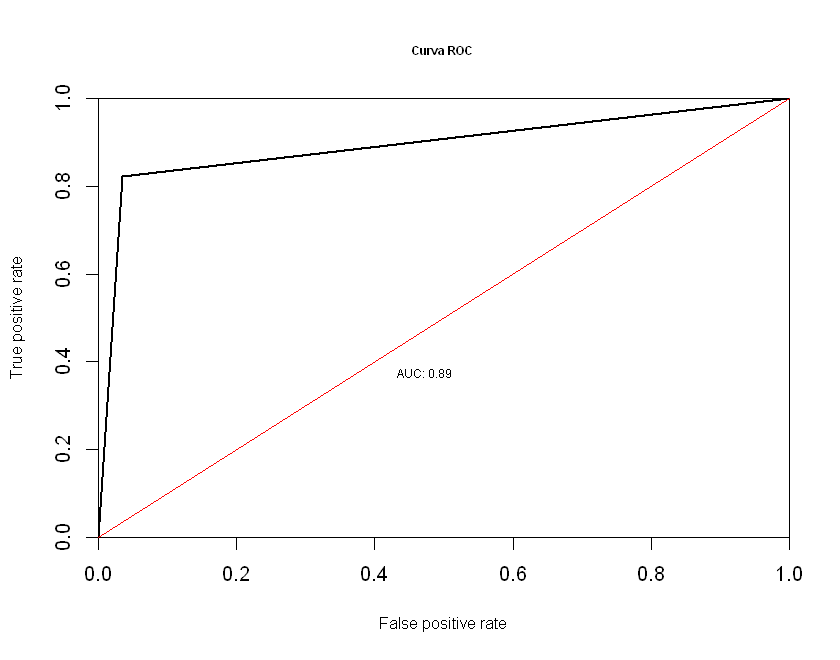

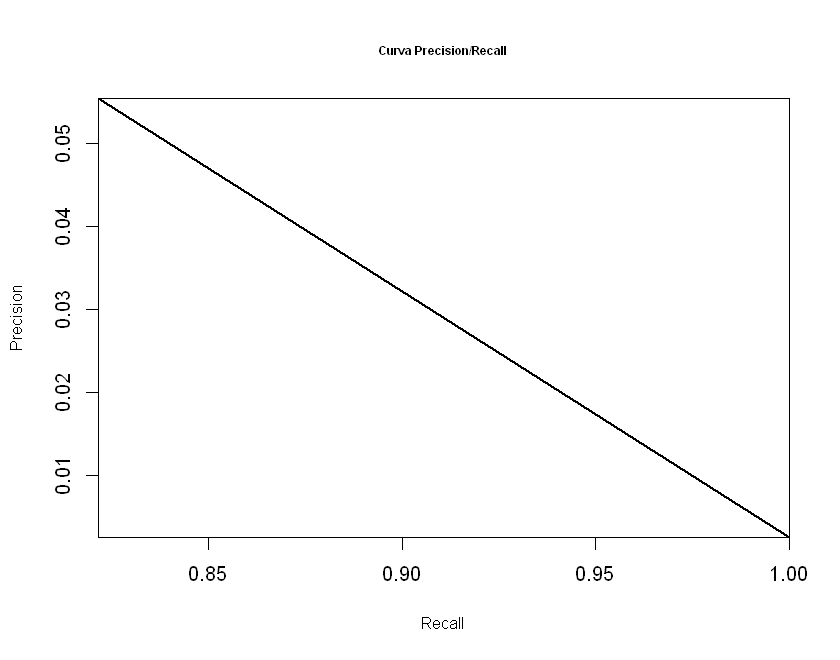

In [96]:
plot.roc.curve(previsao6, title.text = "Curva ROC")
plot.pr.curve(previsao6, title.text = "Curva Precision/Recall")

### **MODELO 7 - RANDOM FOREST (pacote:rpart)**

In [97]:
# CARREGANDO O PACOTE
suppressPackageStartupMessages({library(rpart)})

In [98]:
# MODELO
modelo.randomforest.rpart = rpart(Aplicativo.Baixado ~ ., data = dados_treino_down_sample, control = rpart.control(cp = .0005)) 

In [99]:
# VISUALIZAÇÃO DO MODELO
summary(modelo.randomforest.rpart)
str(modelo.randomforest.rpart)

Call:
rpart(formula = Aplicativo.Baixado ~ ., data = dados_treino_down_sample, 
    control = rpart.control(cp = 0.0005))
  n= 15514 

             CP nsplit rel error    xerror        xstd
1  0.5811525074      0 1.0000000 1.0214000 0.008026730
2  0.0653603197      1 0.4188475 0.4188475 0.006533606
3  0.0573675390      2 0.3534872 0.3534872 0.006125020
4  0.0360319711      3 0.2961196 0.2961196 0.005702841
5  0.0043186799      5 0.2240557 0.2240557 0.005064432
6  0.0029650638      7 0.2154183 0.2158051 0.004981844
7  0.0028361480      8 0.2124533 0.2137424 0.004960843
8  0.0018416545     11 0.2039448 0.2047183 0.004867240
9  0.0013536161     18 0.1910532 0.1955653 0.004769299
10 0.0012891582     20 0.1883460 0.1927291 0.004738310
11 0.0010313265     21 0.1870569 0.1915689 0.004725542
12 0.0008701818     23 0.1849942 0.1913111 0.004722697
13 0.0007734949     27 0.1815135 0.1898930 0.004707006
14 0.0007090370     29 0.1799665 0.1897641 0.004705575
15 0.0006445791     36 0.1749388 0.18847

List of 14
 $ frame              :'data.frame':	93 obs. of  9 variables:
  ..$ var       : Factor w/ 6 levels "<leaf>","ID.App",..: 2 3 5 2 1 2 1 2 6 1 ...
  ..$ n         : int [1:93] 15514 9070 7335 6754 2681 4073 2583 1490 1166 58 ...
  ..$ wt        : num [1:93] 15514 9070 7335 6754 2681 ...
  ..$ dev       : num [1:93] 7757 2281 1160 928 188 ...
  ..$ yval      : num [1:93] 1 1 1 1 1 1 1 1 1 1 ...
  ..$ complexity: num [1:93] 0.58115 0.06536 0.00184 0.00184 0 ...
  ..$ ncompete  : int [1:93] 4 4 4 4 0 4 0 4 4 0 ...
  ..$ nsurrogate: int [1:93] 4 4 0 1 0 1 0 2 1 0 ...
  ..$ yval2     : num [1:93, 1:6] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : NULL
  .. .. ..$ : chr [1:6] "" "" "" "" ...
 $ where              : Named int [1:15514] 7 5 7 7 62 5 62 62 5 7 ...
  ..- attr(*, "names")= chr [1:15514] "1" "2" "3" "4" ...
 $ call               : language rpart(formula = Aplicativo.Baixado ~ ., data = dados_treino_down_sample,      control = rpart.control(c

In [100]:
# PREVISAO DO MODELO
previsao.modelo.randomforest.rpart = predict(modelo.randomforest.rpart, dados_teste_final, type='class')

In [101]:
# MATRIZ DE CONFUSÃO
matriz_confusao7 <- table(Previsto = previsao.modelo.randomforest.rpart, Reference = dados_teste_final$Aplicativo.Baixado)
matriz_confusao7

        Reference
Previsto       0       1
       0 1295345     465
       1   51330    2860

In [102]:
# MATRIZ DE CONFUSÃO
matriz_confusao7.1 <- confusionMatrix(previsao.modelo.randomforest.rpart, dados_teste_final$Aplicativo.Baixado)
matriz_confusao7.1

Confusion Matrix and Statistics

          Reference
Prediction       0       1
         0 1295345     465
         1   51330    2860
                                             
               Accuracy : 0.9616             
                 95% CI : (0.9613, 0.962)    
    No Information Rate : 0.9975             
    P-Value [Acc > NIR] : 1                  
                                             
                  Kappa : 0.0953             
                                             
 Mcnemar's Test P-Value : <0.0000000000000002
                                             
            Sensitivity : 0.96188            
            Specificity : 0.86015            
         Pos Pred Value : 0.99964            
         Neg Pred Value : 0.05278            
             Prevalence : 0.99754            
         Detection Rate : 0.95951            
   Detection Prevalence : 0.95986            
      Balanced Accuracy : 0.91102            
                                      

#### **MÉTRICAS DO MODELO RANDOM FOREST rpart**

In [103]:
# ACURÁCIA
# TRUE POSITIVO = tp
# TRUE NEGATIVO = tn
# FALSO POSITIVO = fp
# FALSO NEGATIVO = fn
# Accuracy: tp + tn/ tp + tn + fp + fn OU Total de resultados corretos/ Total de resultados analisados

Acuracia7 <- (matriz_confusao7[1,1] + matriz_confusao7[2,2])/(matriz_confusao7[1,1] + matriz_confusao7[2,2] + 
matriz_confusao7[1,2] + matriz_confusao7[2,1])

# PRECISÃO
# tp/(tp + fp)
precisao7 <- matriz_confusao7[1,1]/(matriz_confusao7[1,1] + matriz_confusao7[1,2])

# RECUPERAÇÃO 
# tp/(tp + fn)
recall7 <- matriz_confusao7[1,1] / (matriz_confusao7[1,1] + matriz_confusao7[2,1])

# F1 SCORE
# 2*tp / (2 * tp + fp + fn) OU 2 * precisao * recall/ (precisao + recall)

f1_score7 <- 2 * precisao7 * recall7/(precisao7 + recall7)

In [104]:
cat("Modelo Random Forest rpart\n\nAcurácia:", round(Acuracia7,4),
    "\nRecall:", round(recall7,4),
    "\nPrecisão:", round(precisao7,4),
    "\nF1 Score:", round(f1_score7,4))

Modelo Random Forest rpart

Acurácia: 0.9616 
Recall: 0.9619 
Precisão: 0.9996 
F1 Score: 0.9804

In [105]:
# CURVA ROC
previsao7 <- prediction(as.numeric(previsao.modelo.randomforest.rpart), dados_teste_final$Aplicativo.Baixado)

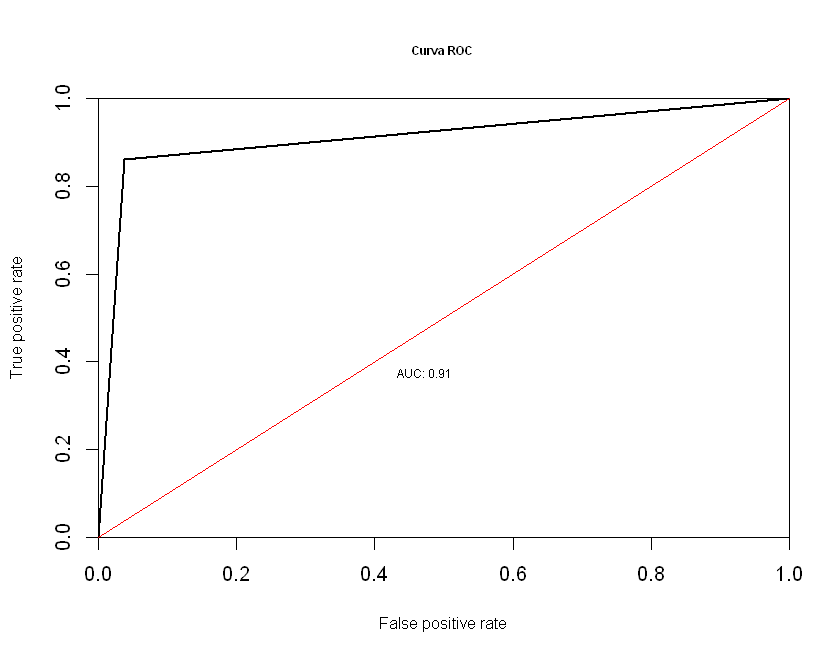

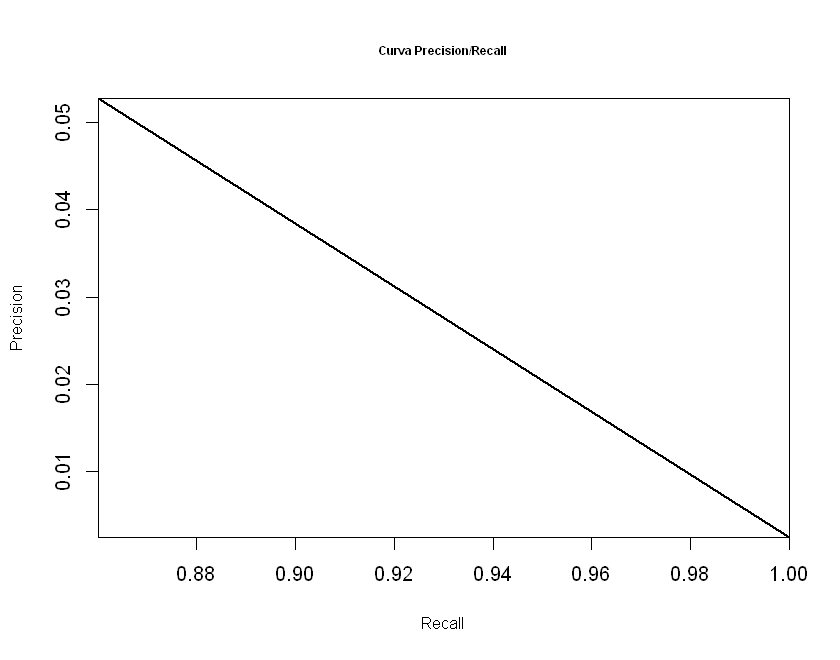

In [106]:
plot.roc.curve(previsao7, title.text = "Curva ROC")
plot.pr.curve(previsao7, title.text = "Curva Precision/Recall")

### **MODELO 8 - RANDOM FOREST (pacote: randomForest)**

In [107]:
# CARREGANDO O PACOTE
suppressPackageStartupMessages({library(randomForest)})

In [ ]:
# MODELO
#modelo.randomforest.randomForest <- randomForest(Aplicativo.Baixado ~ ., 
#                                                 data = dados_treino_down_sample,  ntree = 500, nodesize = 10)      

In [ ]:
# VISUALIZANDO O MODELO
#print(modelo.randomforest.randomForest)

In [ ]:
# SALVANDO O MODELO TREINADO
#saveRDS(modelo.randomforest.randomForest, "modelo.randomforest.randomForest.rds")

In [108]:
# CARREGANDO O MODELO TREINADO
modelo.randomforest.randomForest <- readRDS("modelo.randomforest.randomForest.rds")

In [109]:
# VISUALIZANDO O MODELO
print(modelo.randomforest.randomForest)


Call:
 randomForest(formula = Aplicativo.Baixado ~ ., data = dados_treino_down_sample,      ntree = 500, nodesize = 10) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 8.96%
Confusion matrix:
     0    1 class.error
0 7415  342  0.04408921
1 1048 6709  0.13510378


In [110]:
# PREVISAO DO MODELO
previsao.modelo.randomforest.randomForest = predict(modelo.randomforest.randomForest, dados_teste_final)

In [111]:
# MATRIZ DE CONFUSÃO
matriz_confusao8 <- table(Previsto = previsao.modelo.randomforest.randomForest,
                          Reference = dados_teste_final$Aplicativo.Baixado)
matriz_confusao8

        Reference
Previsto       0       1
       0 1289129     435
       1   57546    2890

In [112]:
# MATRIZ DE CONFUSÃO
matriz_confusao8.1 <- confusionMatrix(previsao.modelo.randomforest.randomForest,
                                      dados_teste_final$Aplicativo.Baixado)
matriz_confusao8.1

Confusion Matrix and Statistics

          Reference
Prediction       0       1
         0 1289129     435
         1   57546    2890
                                             
               Accuracy : 0.9571             
                 95% CI : (0.9567, 0.9574)   
    No Information Rate : 0.9975             
    P-Value [Acc > NIR] : 1                  
                                             
                  Kappa : 0.0864             
                                             
 Mcnemar's Test P-Value : <0.0000000000000002
                                             
            Sensitivity : 0.95727            
            Specificity : 0.86917            
         Pos Pred Value : 0.99966            
         Neg Pred Value : 0.04782            
             Prevalence : 0.99754            
         Detection Rate : 0.95491            
   Detection Prevalence : 0.95523            
      Balanced Accuracy : 0.91322            
                                      

#### **MÉTRICAS  DO MODELO RANDOM FOREST randomForest**

In [113]:
# ACURÁCIA
# TRUE POSITIVO = tp
# TRUE NEGATIVO = tn
# FALSO POSITIVO = fp
# FALSO NEGATIVO = fn
# Accuracy: tp + tn/ tp + tn + fp + fn OU Total de resultados corretos/ Total de resultados analisados

Acuracia8 <- (matriz_confusao8[1,1] + matriz_confusao8[2,2])/(matriz_confusao8[1,1] + matriz_confusao8[2,2] + 
matriz_confusao8[1,2] + matriz_confusao8[2,1])

# PRECISÃO
# tp/(tp + fp)
precisao8 <- matriz_confusao8[1,1]/(matriz_confusao8[1,1] + matriz_confusao8[1,2])

# RECUPERAÇÃO 
# tp/(tp + fn)
recall8 <- matriz_confusao8[1,1] / (matriz_confusao8[1,1] + matriz_confusao8[2,1])

# F1 SCORE
# 2*tp / (2 * tp + fp + fn) OU 2 * precisao * recall/ (precisao + recall)

f1_score8 <- 2 * precisao8 * recall8/(precisao8 + recall8)

In [114]:
cat("Modelo Random Forest rpart\n\nAcurácia:", round(Acuracia8,4),
    "\nRecall:", round(recall8,4),
    "\nPrecisão:", round(precisao8,4),
    "\nF1 Score:", round(f1_score8,4))

Modelo Random Forest rpart

Acurácia: 0.9571 
Recall: 0.9573 
Precisão: 0.9997 
F1 Score: 0.978

In [115]:
# CURVA ROC
previsao8 <- prediction(as.numeric(previsao.modelo.randomforest.randomForest), dados_teste_final$Aplicativo.Baixado)

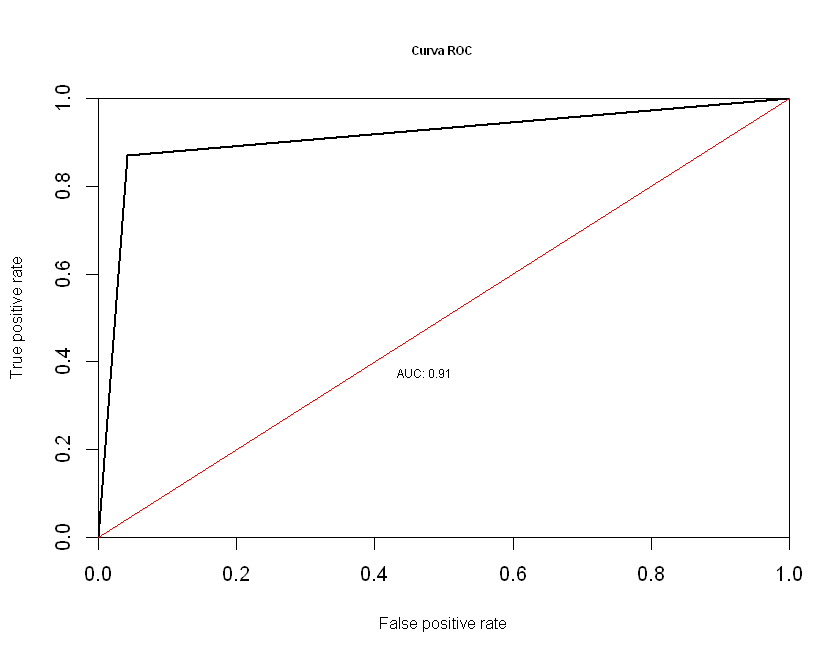

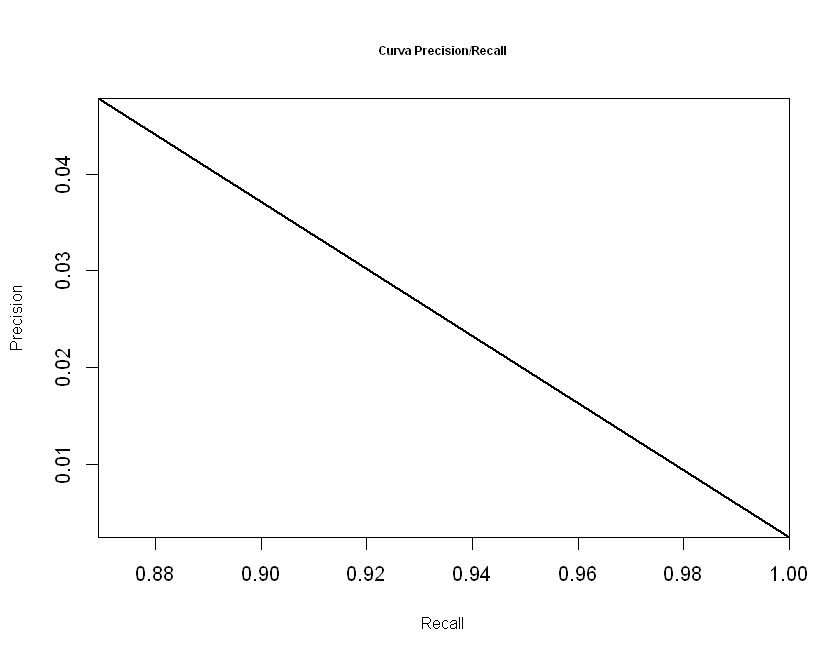

In [116]:
plot.roc.curve(previsao8, title.text = "Curva ROC")
plot.pr.curve(previsao8, title.text = "Curva Precision/Recall")

                               TABELA COMPARATIVA DOS RESULTADOS DOS MODELOS

In [117]:
Modelo = c('Regressao Logistica','Naive Bayes','SVM','SVM','KNN','Decision tree','Random Forest','Random Forest')
Pacote = c('caret', 'e1071', 'e1071', 'kernlab', 'class', 'rpart', 'rpart', 'randomForest')
TP = c(matriz_confusao1[1,1], matriz_confusao2[1,1], matriz_confusao3[1,1], matriz_confusao4[1,1], matriz_confusao5[1,1],
      matriz_confusao6[1,1], matriz_confusao7[1,1], matriz_confusao8[1,1])

TN = c(matriz_confusao1[2,2], matriz_confusao2[2,2], matriz_confusao3[2,2], matriz_confusao4[2,2], matriz_confusao5[2,2],
      matriz_confusao6[2,2], matriz_confusao7[2,2], matriz_confusao8[2,2])

FP = c(matriz_confusao1[1,2], matriz_confusao2[1,2], matriz_confusao3[1,2], matriz_confusao4[1,2], matriz_confusao5[1,2],
      matriz_confusao6[1,2], matriz_confusao7[1,2], matriz_confusao8[1,2])

FN = c(matriz_confusao1[2,1], matriz_confusao2[2,1], matriz_confusao3[2,1], matriz_confusao4[2,1], matriz_confusao5[2,1],
      matriz_confusao6[2,1], matriz_confusao7[2,1], matriz_confusao8[2,1])

Acuracia = c(Acuracia1, Acuracia2, Acuracia3, Acuracia4, Acuracia5, Acuracia6, Acuracia7, Acuracia8)
Precisao = c(precisao1, precisao2, precisao3, precisao4, precisao5, precisao6, precisao7, precisao8)
Recall = c(recall1, recall2, recall3, recall4, recall5, recall6, recall7, recall8)
f1_score = c(f1_score1, f1_score2, f1_score3, f1_score4, f1_score5, f1_score6, f1_score7, f1_score8)

Tabela = data.frame(Modelo, Pacote, TP, TN, FP, FN, Acuracia, Precisao, Recall, f1_score)
Tabela[order(Tabela$Acuracia, Tabela$TP, decreasing = T),]

,Modelo,Pacote,TP,TN,FP,FN,Acuracia,Precisao,Recall,f1_score
6,Decision tree,rpart,1300162,2732,593,46513,0.9651067,0.9995441,0.9654609,0.9822069
7,Random Forest,rpart,1295345,2860,465,51330,0.9616333,0.9996412,0.9618839,0.9803991
8,Random Forest,randomForest,1289129,2890,435,57546,0.9570511,0.9996627,0.9572681,0.9780062
3,SVM,e1071,1208028,2478,847,138647,0.8966711,0.9992993,0.8970449,0.9454153
2,Naive Bayes,e1071,1181586,2099,1226,165089,0.8768037,0.9989635,0.8774099,0.9342495
4,SVM,kernlab,1102250,2412,913,244425,0.8182681,0.9991724,0.8184974,0.8998554
1,Regressao Logistica,caret,1085477,2457,868,261198,0.8058770,0.9992010,0.8060423,0.8922878
5,KNN,class,1026881,2082,1243,319794,0.7621948,0.9987910,0.7625307,0.8651453


In [ ]:
# TP = APLICATIVO NÃO FOI BAIXADO E O CLASSIFICOU COMO NÃO BAIXADO (ACERTO)
# TN = APLICATIVO FOI BAIXADO E O MODELO CLASSIFICOU COMO BAIXADO (ACERTOU)
# FP = APLICATIVO FOI BAIXADO E O MODELO CLASSIFICOU COMO NÃO BAIXADO (ERROU)
# FN = APLICATIVO NÃO FOI BAIXADO E O MODELO CLASSIFICOU COMO BAIXADO (ERROU)

A Decision Tree obteve a maior acurácia e o número de True Positivo (TP) maior que todos os outros modelos e a terceira maior AUC, com 0.89. embora a Decision Tree tenha a maior acurácia e a maior quantidade de True Positivos, os dois modelos Random Forest (7 e 8) obtiveram valores parecidos (precisão, recall e f1 score), porém com a AUC superior ao Decision Tree, com 0.91 cada. também obtiveram um número de Falsos Positivos (FP) menor.

Penso que com o número de Falsos Positivos menor (FP), a empresa poderia estar colocando em sua lista negra **menos** IPs de cliques que baixaram o aplicativo, mas que foram classificados como cliques que não baixaram.


EX. FP (aplicativo foi baixado e o modelo classificou como não baixado)

Decision tree - rpart
593/3325 = 17,83%

Random Forest - rpart 
465/3325 = 13,98%
(O modelo 7 foi o que escolhi, pois teve uma das melhores acurácias e o segundo menor FP e FN)

Random Forest - randomForest 
435/3325 = 13,08%
